In [1]:
%matplotlib notebook
import matplotlib
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np

# Jupyter Specifics
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed
display(HTML("<style>.container { width:100% !important; }</style>"))
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

In [2]:
from Cluster import *

Getting data:
getting JHU data...
number of countries listed 274
done with JHU data.  Got  274 countries.
getting owid data...
data for population changes only slowly if at all in OWID database
done with owid data. Got 212 countries
WHO acute file found dictionary acute_who
ICU file found dictionary icus_2012
---------------------------------
Done with data.
---------------------------------
Getting deaths, case and testing data...
done.
doing piecwise linear fits to testing data ...
done.
making cases with nonlinear testing adjustment...
done.
to change the nonlinear correction function, call make_cases_adj_nonlin(K), K=2 by default


In [3]:
datasets = ['deaths','cases','cases_lin2020','cases_pwlfit','cases_nonlin']

d_countries = [c for c in clusdata_all['deaths']]
c_countries = [c for c in clusdata_all['cases']]
lc_countries = [c for c in clusdata_all['cases_lin2020']]
pc_countries = [c for c in clusdata_all['cases_pwlfit']]
nc_countries = [c for c in clusdata_all['cases_nonlin']]

countries = d_countries

In [4]:
# check that all country sets being used are the same and check time series lengths and starting dates
countrysets = [d_countries,c_countries,lc_countries,pc_countries,nc_countries]
print([len(ccs) for ccs in countrysets])
for ccs1 in countrysets:
    print([ccs1 == ccs2 for ccs2 in countrysets])
print([len(clusdata_all[d1]['United States']) for d1 in datasets])
print(len(total_deaths_x['dates']),len(total_cases_x['dates']),len(testing_x['dates']),total_deaths_x['dates'][0],total_cases_x['dates'][0],testing_x['dates'][0])

[59, 59, 59, 59, 59]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[163, 163, 163, 163, 163]
265 265 265 12/31/19 12/31/19 12/31/19


In [5]:
len(testing_x['dates'])

265

# ClusterFit testing

In [6]:
np.argsort(list(range(4,14)))[-1:][0]

9

16000 2 seats

In [7]:

base = '../../covid-19-JH/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_jhu = get_data(base+'time_series_covid19_confirmed_global.csv')
deaths_jhu = get_data(base+'time_series_covid19_deaths_global.csv')

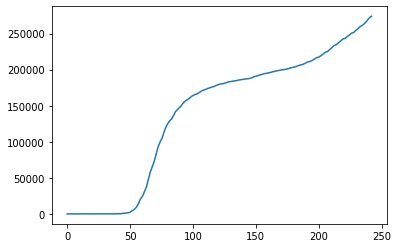

In [8]:

plt.plot(confirmed_jhu[('Germany','')])

## cases FFT

In [9]:
len(clusdata_all['cases'])

59

In [10]:
foofft = ClusterFit(clusdata_all['cases'],fft='fft') # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['cases'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
#foo = ClusterFit(clusdata_all['cases'],fft=None) 

hdbscan found 2 clusters.
mean cluster membership probability = 0.9344756350444562


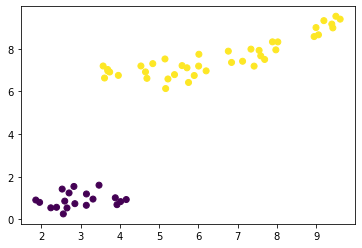

In [11]:
foofft.umap_cluster(5,5)
print('mean cluster membership probability =',np.mean(foofft.clus_probs))
foofft.plot_umap()

In [17]:
# foo.umap_best_cluster(Nclus=3)
foofft.umap_best_cluster()

found 6 clusters of size 3


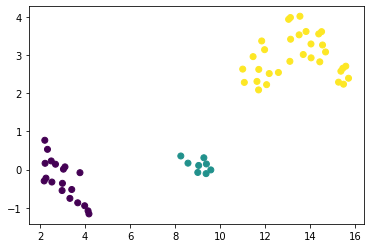

In [18]:
foofft.plot_umap()

In [19]:
np.mean(foofft.clus_probs)

0.9330738257857678

In [20]:
foofft.clus_labels

array([1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0,
       0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2,
       0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 2])

sorting countries according to cluster labels


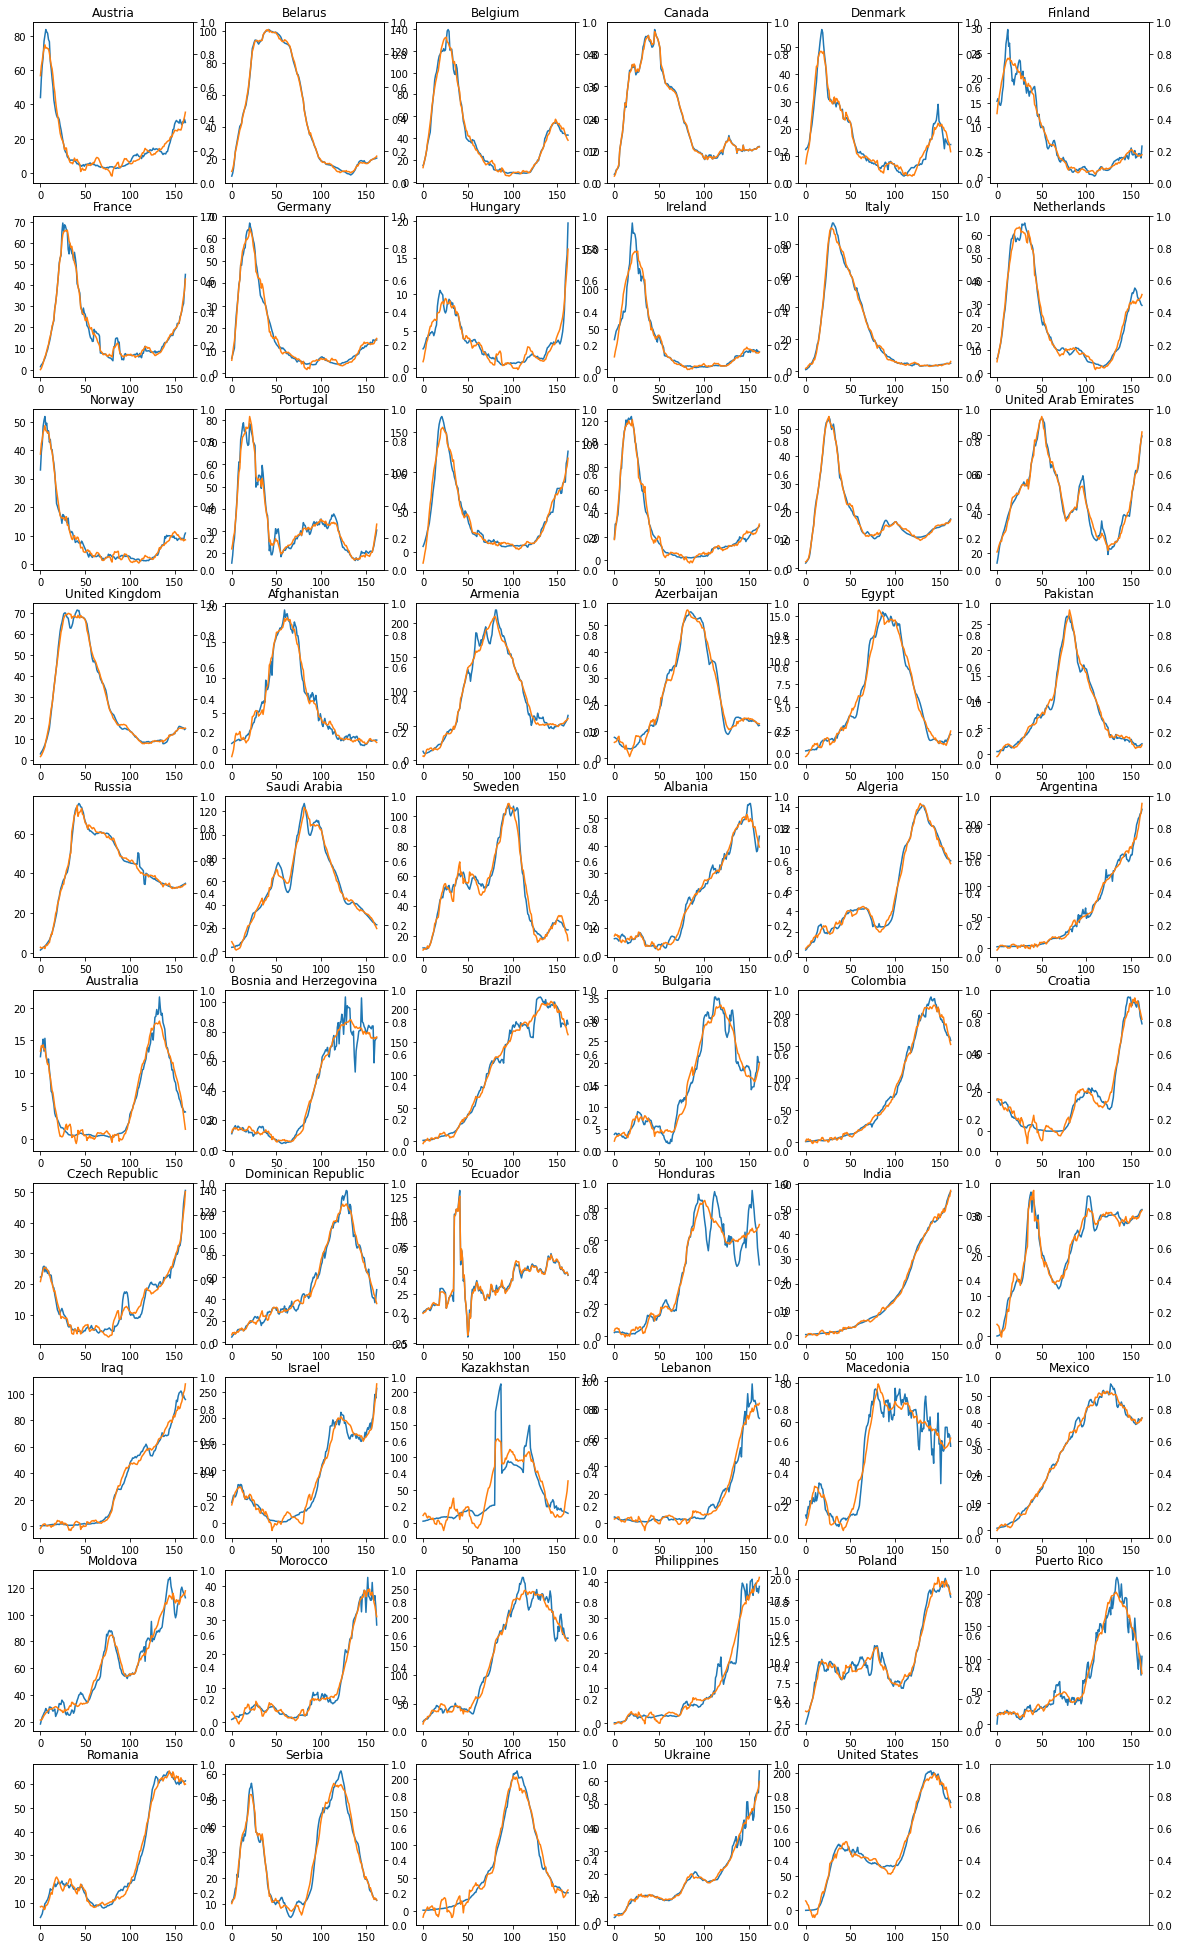

In [21]:
foofft.cluster_plot_all()

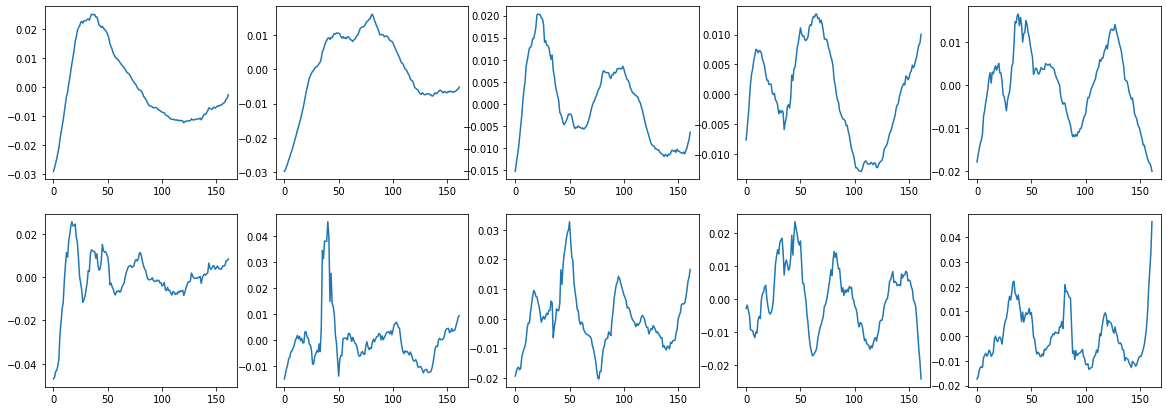

In [22]:
foofft.plot_pcas()

In [23]:
clsize = []
clprobs = []
for i in range(100):
    foofft.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foofft.clus_labels)))
    clprobs.append(np.mean(foofft.clus_probs))

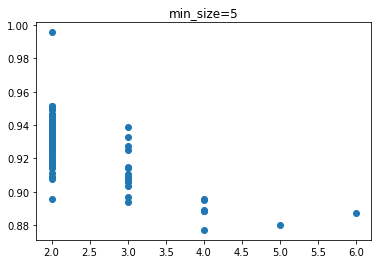

In [24]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

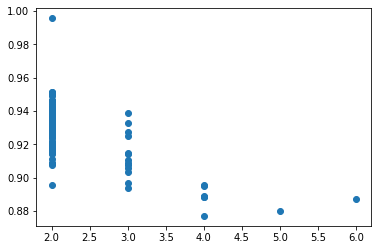

In [25]:
# min_size = 6
plt.scatter(clsize,clprobs)

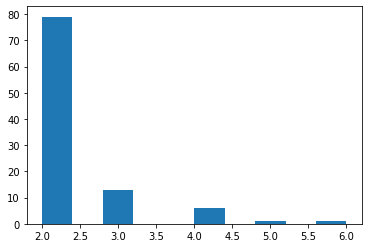

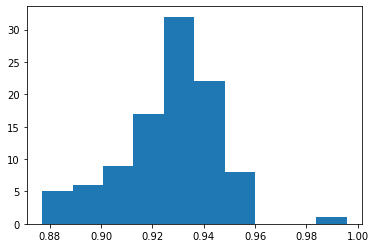

In [26]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

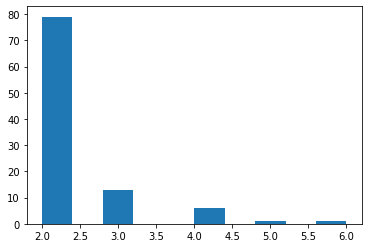

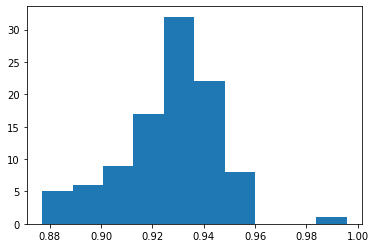

In [27]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

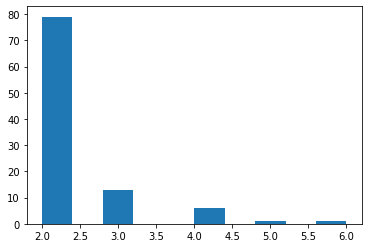

In [28]:
plt.hist(clsize);

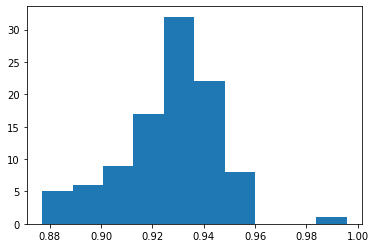

In [29]:
plt.hist(clprobs);

In [31]:
clusfit_all = {}
clusfit_all['cases'] = foofft

## cases

In [23]:
len(clusdata_all['cases'])

59

In [24]:
#foo = ClusterFit(clusdata_all['cases'],fft='fft') # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['cases'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
foo = ClusterFit(clusdata_all['cases'],fft=None) 

hdbscan found 2 clusters.
mean cluster membership probability = 0.9949766251278741


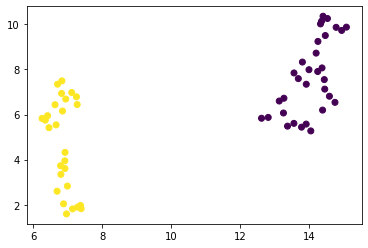

In [25]:
foo.umap_cluster(5,5,n_neighbors=6)
print('mean cluster membership probability =',np.mean(foo.clus_probs))
foo.plot_umap()

In [26]:
foo.clus_labels
print(len(foo.clus_labels))
print(len(c_countries))

59
59


In [27]:
foo.clus_labels

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [28]:
labelled = [(foo.clus_labels[i],c_countries[i]) for i in range(len(foo.clus_labels))]
print(labelled)

[(1, 'Afghanistan'), (0, 'Albania'), (0, 'Algeria'), (0, 'Argentina'), (1, 'Armenia'), (0, 'Australia'), (1, 'Austria'), (1, 'Azerbaijan'), (1, 'Belarus'), (1, 'Belgium'), (0, 'Bosnia and Herzegovina'), (0, 'Brazil'), (0, 'Bulgaria'), (1, 'Canada'), (0, 'Colombia'), (0, 'Croatia'), (0, 'Czech Republic'), (1, 'Denmark'), (0, 'Dominican Republic'), (0, 'Ecuador'), (1, 'Egypt'), (1, 'Finland'), (1, 'France'), (1, 'Germany'), (0, 'Honduras'), (1, 'Hungary'), (0, 'India'), (0, 'Iran'), (0, 'Iraq'), (1, 'Ireland'), (0, 'Israel'), (1, 'Italy'), (0, 'Kazakhstan'), (0, 'Lebanon'), (0, 'Macedonia'), (0, 'Mexico'), (0, 'Moldova'), (0, 'Morocco'), (1, 'Netherlands'), (1, 'Norway'), (1, 'Pakistan'), (0, 'Panama'), (0, 'Philippines'), (0, 'Poland'), (1, 'Portugal'), (0, 'Puerto Rico'), (0, 'Romania'), (1, 'Russia'), (1, 'Saudi Arabia'), (0, 'Serbia'), (0, 'South Africa'), (1, 'Spain'), (1, 'Sweden'), (1, 'Switzerland'), (1, 'Turkey'), (0, 'Ukraine'), (1, 'United Arab Emirates'), (1, 'United Kingdom'

In [29]:
np.lexsort((c_countries,foo.clus_labels))

array([ 1,  2,  3,  5, 10, 11, 12, 14, 15, 16, 18, 19, 24, 26, 27, 28, 30,
       32, 33, 34, 35, 36, 37, 41, 42, 43, 45, 46, 49, 50, 55, 58,  0,  4,
        6,  7,  8,  9, 13, 17, 20, 21, 22, 23, 25, 29, 31, 38, 39, 40, 44,
       47, 48, 51, 52, 53, 54, 56, 57])

In [30]:
# foo.umap_best_cluster(Nclus=3)
foo.umap_best_cluster(Nclus=4,n_neighbors=6)

found 7 clusters of size 4


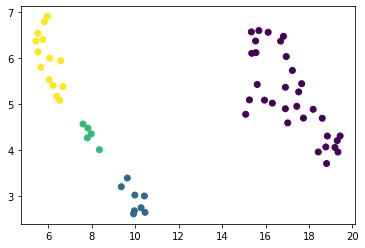

In [31]:
foo.plot_umap()

In [32]:
np.mean(foo.clus_probs)

0.9517547884926628

In [33]:
foo.clus_labels

array([1, 0, 0, 0, 1, 0, 3, 1, 2, 3, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 1, 3,
       3, 3, 0, 3, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 0, 0,
       3, 0, 0, 1, 1, 0, 0, 3, 1, 3, 3, 0, 2, 2, 0])

sorting countries according to cluster labels


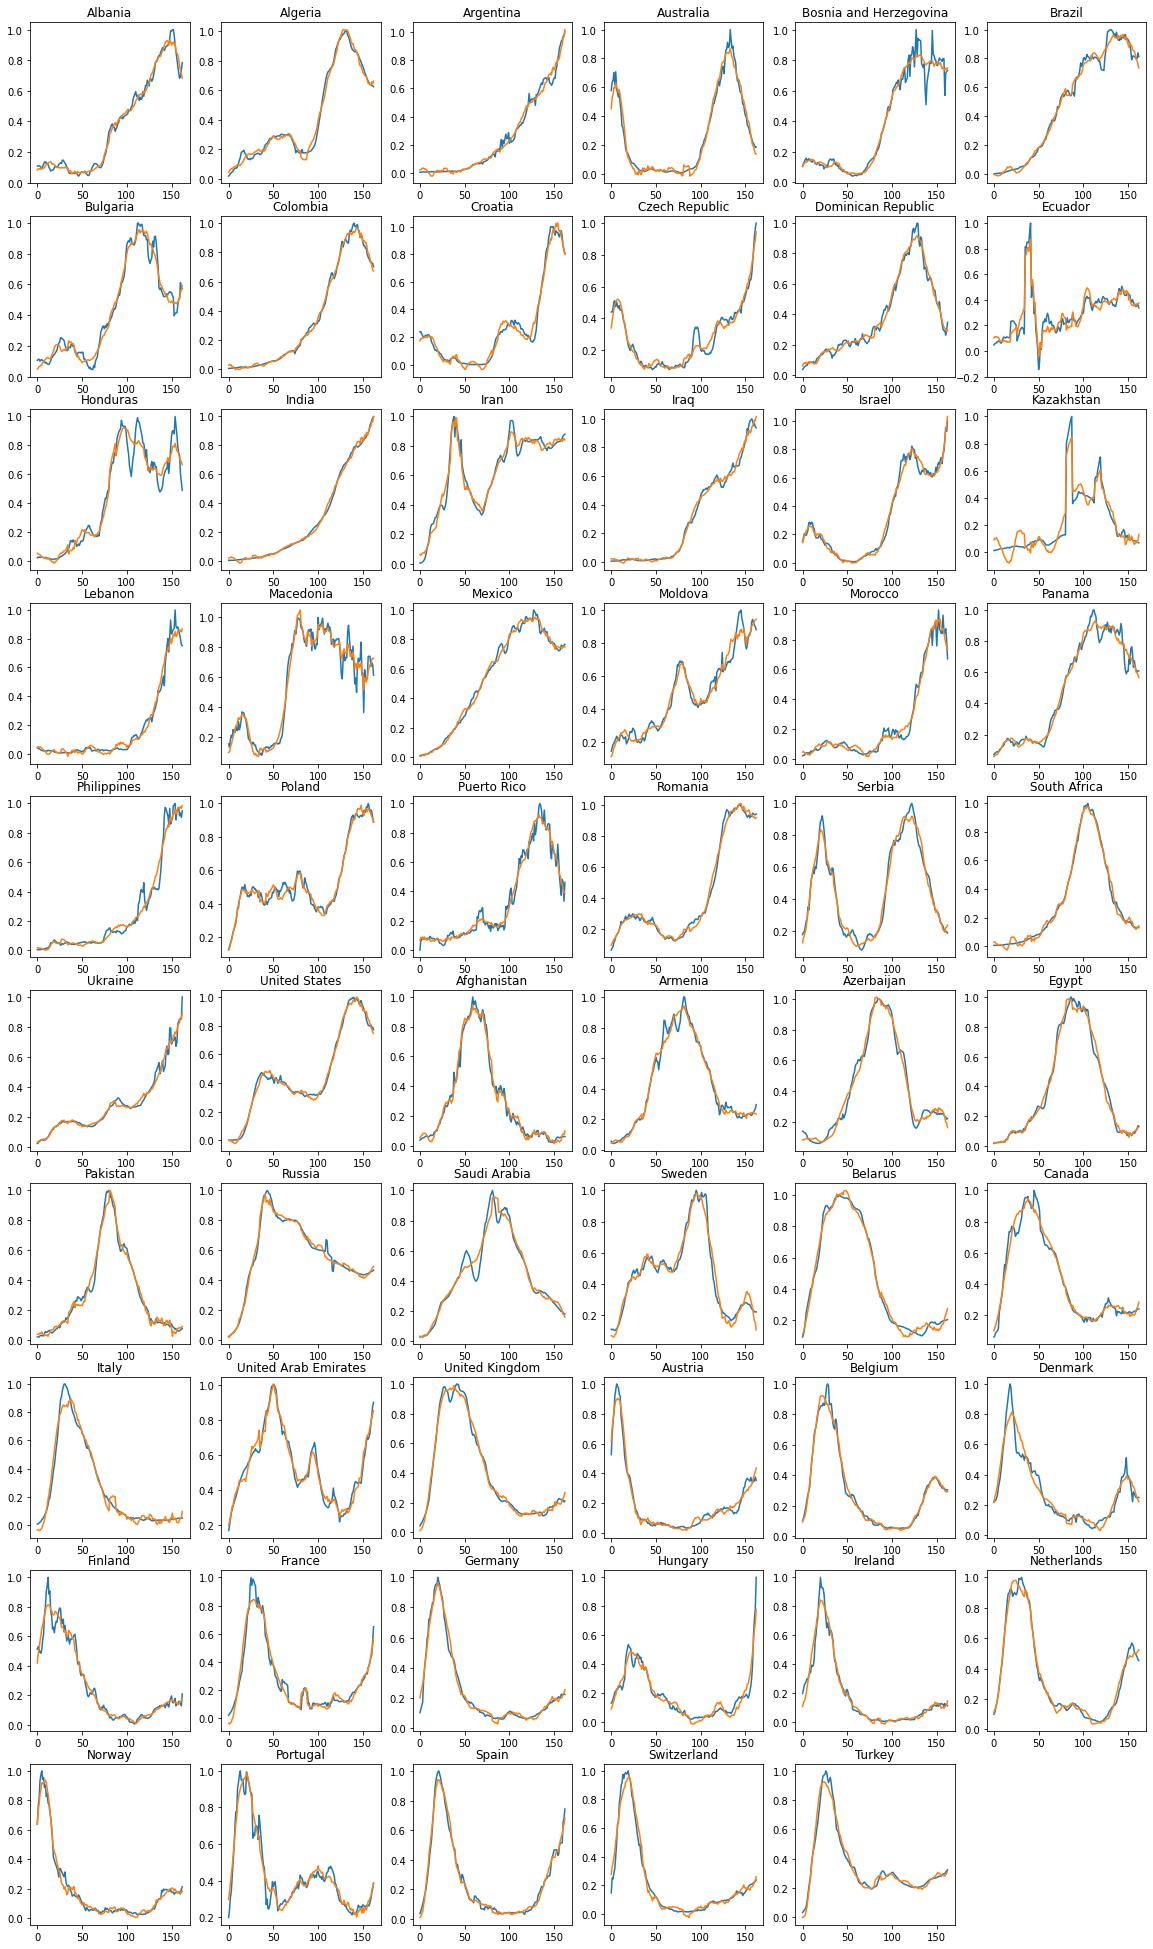

In [34]:
foo.cluster_plot_all()

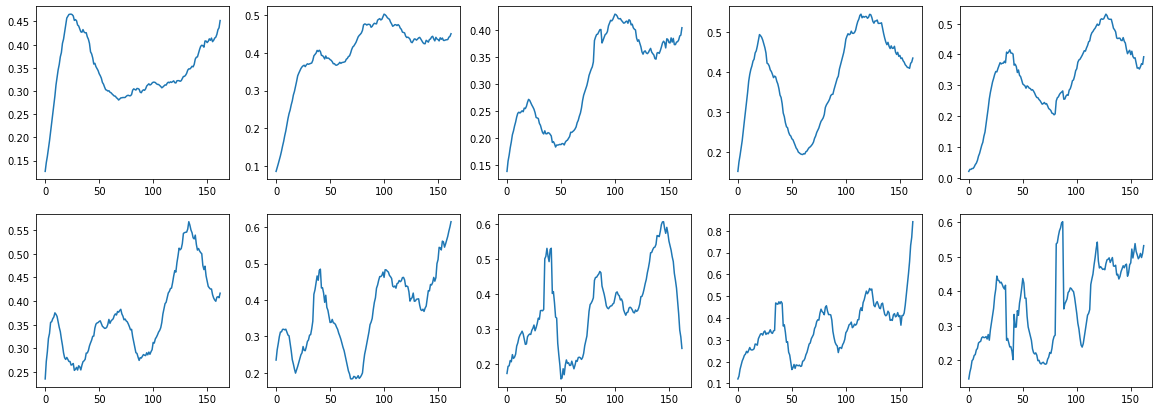

In [35]:
foo.plot_pcas()

In [36]:
clsize = []
clprobs = []
for i in range(100):
    foo.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foo.clus_labels)))
    clprobs.append(np.mean(foo.clus_probs))

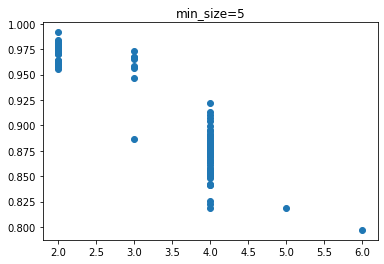

In [37]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

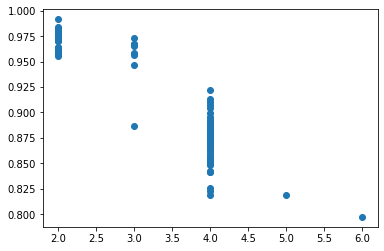

In [38]:
# min_size = 6
plt.scatter(clsize,clprobs)

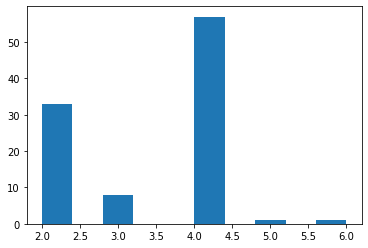

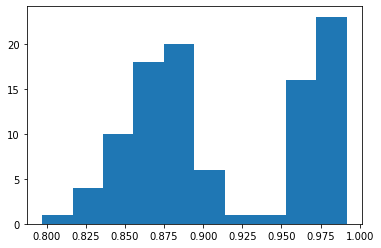

In [39]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

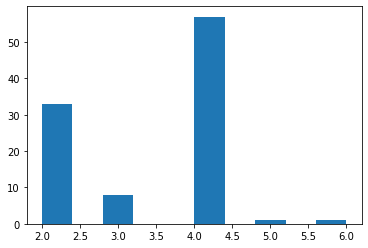

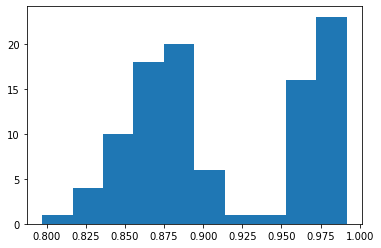

In [40]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

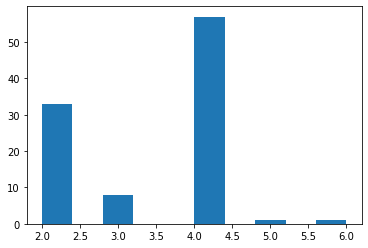

In [41]:
plt.hist(clsize);

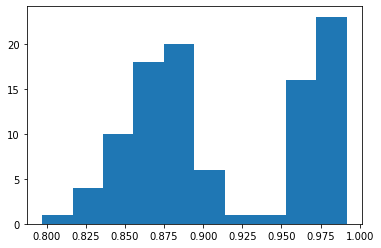

In [42]:
plt.hist(clprobs);

In [44]:
clusfit_all = {}
clusfit_all['cases'] = foo

## deaths FFT

In [50]:
len(clusdata_all['deaths'])

59

In [51]:
foofft = ClusterFit(clusdata_all['deaths'],fft='fft') # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['deaths'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
#foo = ClusterFit(clusdata_all['deaths'],fft=None) 

hdbscan found 2 clusters.
mean cluster membership probability = 0.9416301978166252


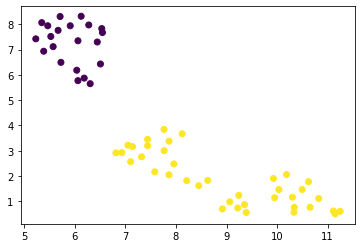

In [52]:
foofft.umap_cluster(5,5)
print('mean cluster membership probability =',np.mean(foofft.clus_probs))
foofft.plot_umap()

In [59]:
# foo.umap_best_cluster(Nclus=3)
foofft.umap_best_cluster(Nclus=2)

found 50 clusters of size 2


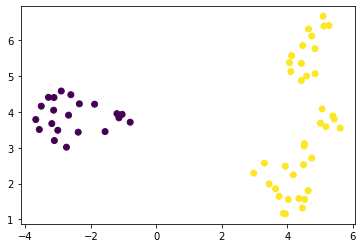

In [60]:
foofft.plot_umap()

In [61]:
np.mean(foofft.clus_probs)

0.9998543434230636

sorting countries according to cluster labels


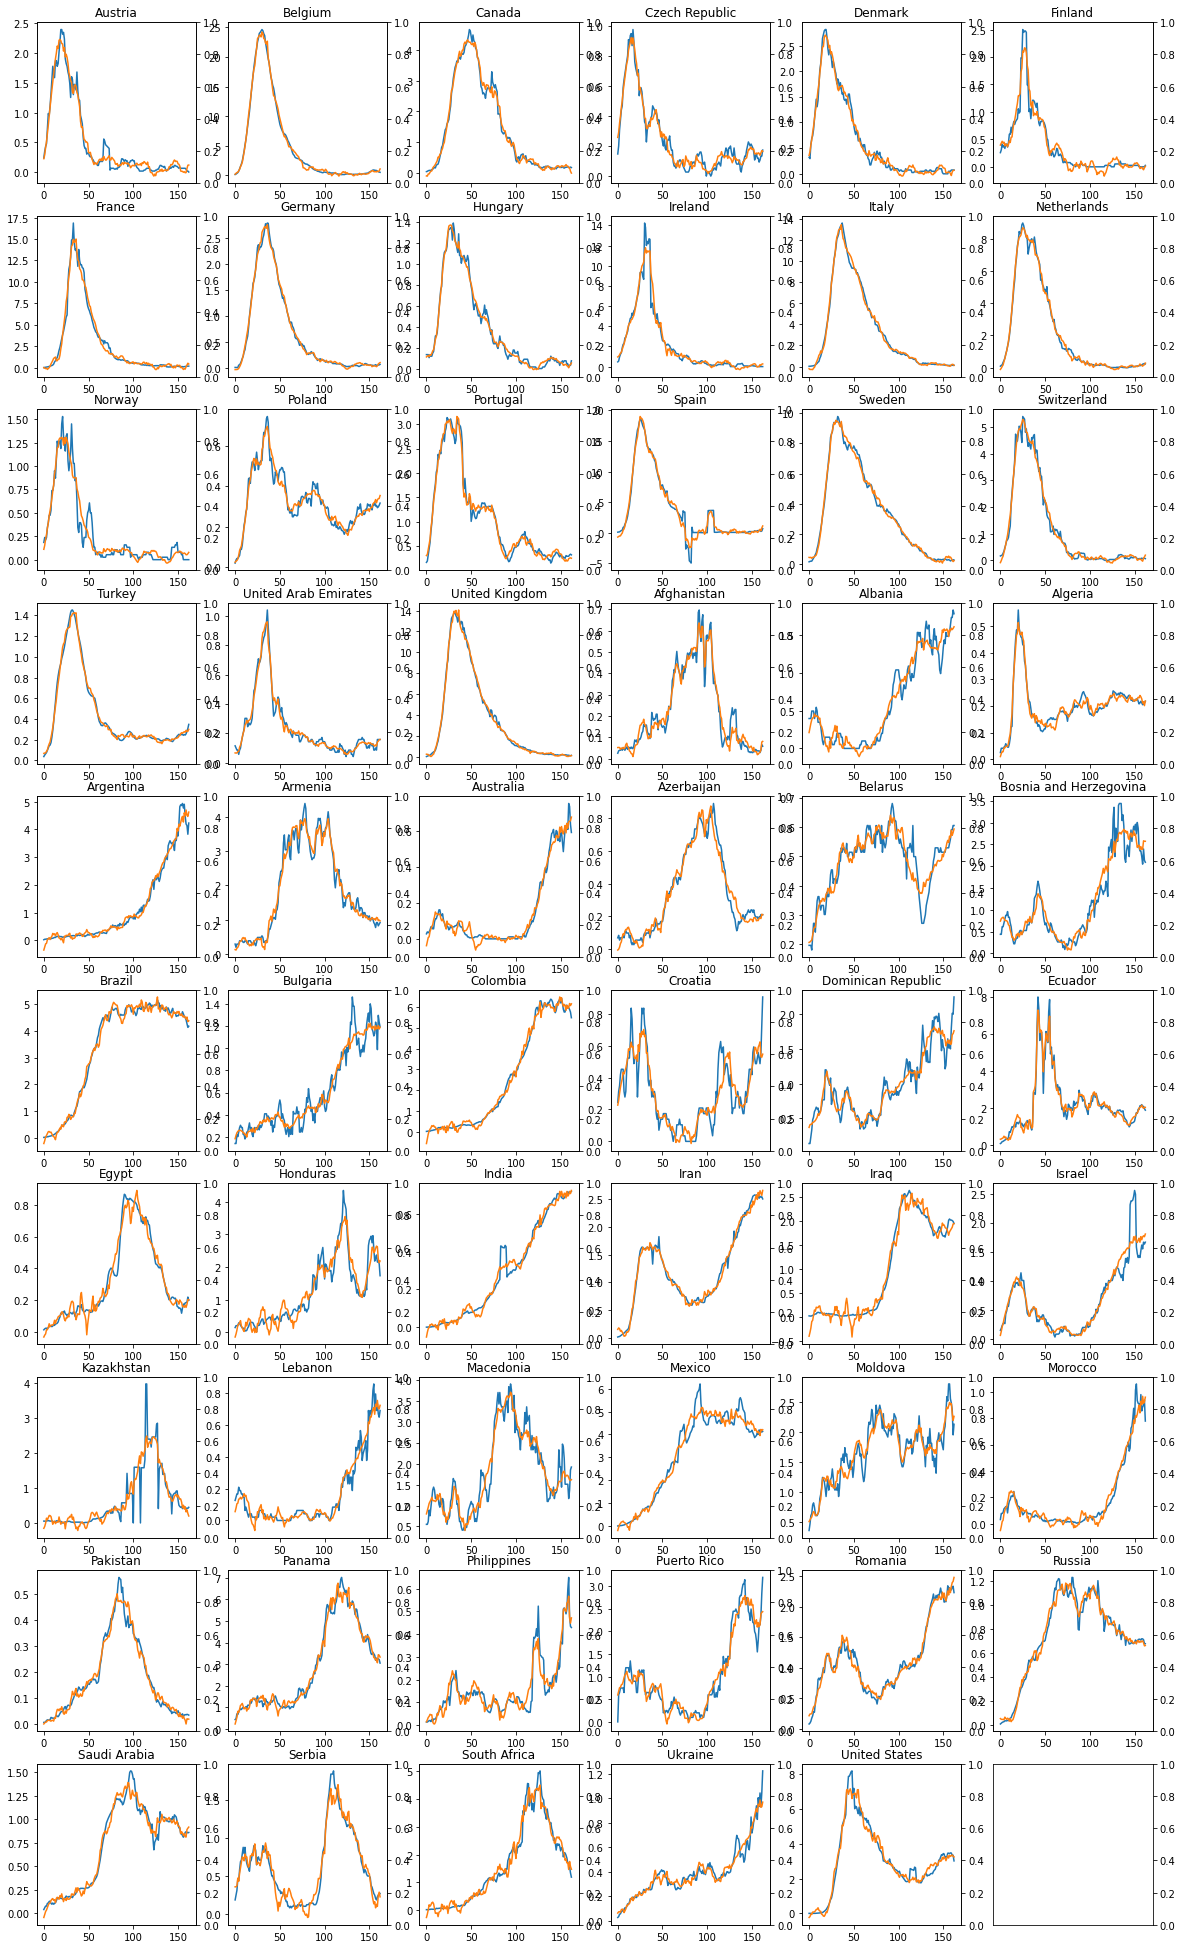

In [62]:
foofft.cluster_plot_all()

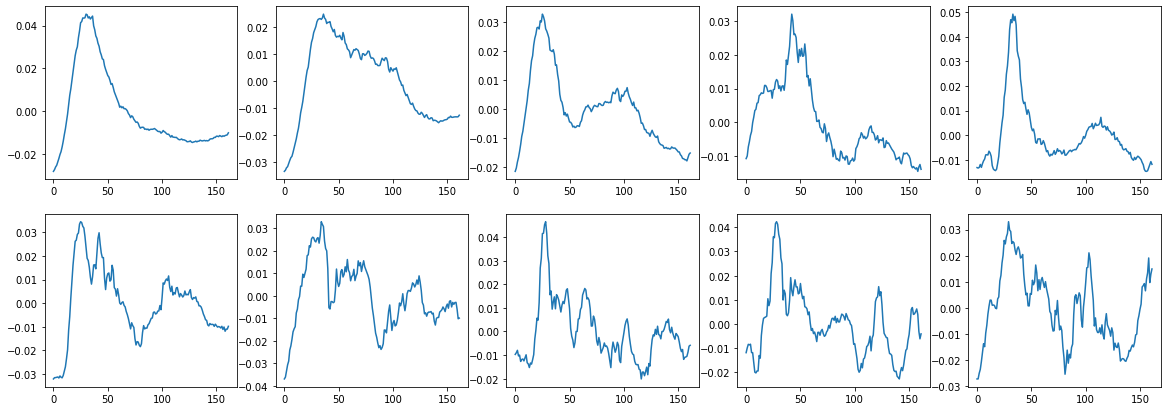

In [63]:
foofft.plot_pcas()

In [64]:
clsize = []
clprobs = []
for i in range(100):
    foofft.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foofft.clus_labels)))
    clprobs.append(np.mean(foofft.clus_probs))

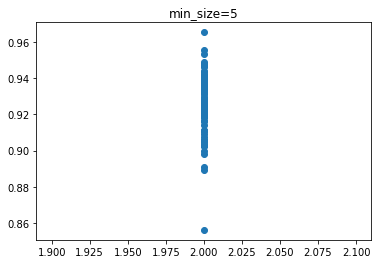

In [65]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

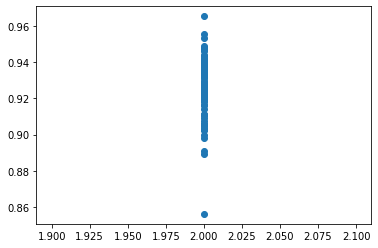

In [66]:
# min_size = 6
plt.scatter(clsize,clprobs)

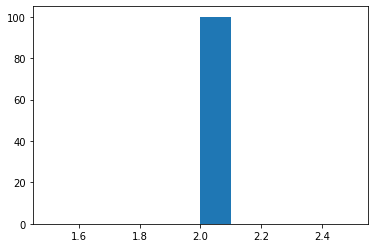

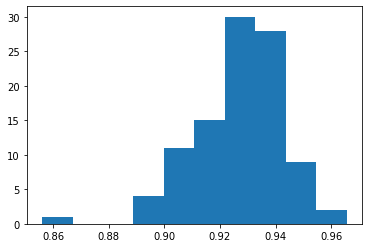

In [67]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

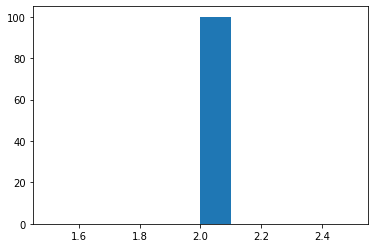

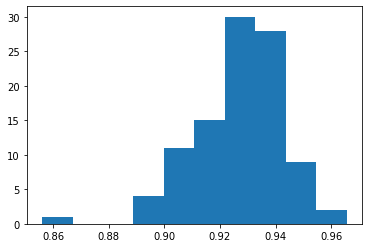

In [68]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

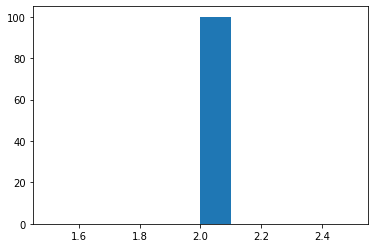

In [69]:
plt.hist(clsize);

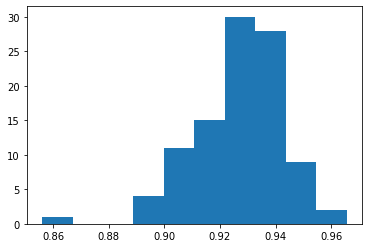

In [70]:
plt.hist(clprobs);

In [71]:
clusfit_all = {}
clusfit_all['cases'] = foofft

## deaths FFT

In [45]:
foo = ClusterFit(clusdata_all['deaths'],fft='fft')

In [46]:
foo.umap_cluster(3) # arg = random seed

hdbscan found 2 clusters.


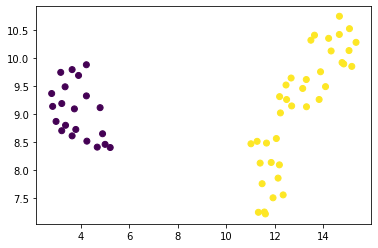

In [47]:
foo.plot_umap()

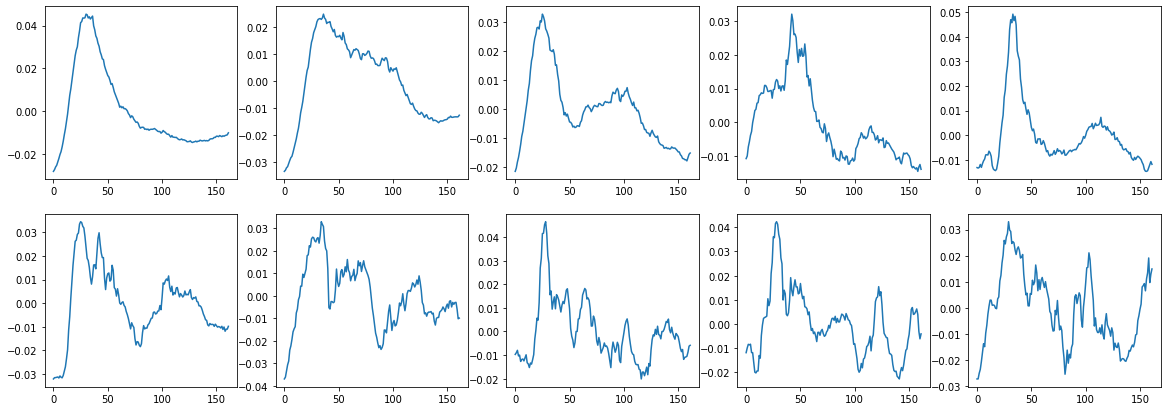

In [48]:
foo.plot_pcas()

In [49]:
clusfit_all['deaths'] = foo

# Plots of all countries

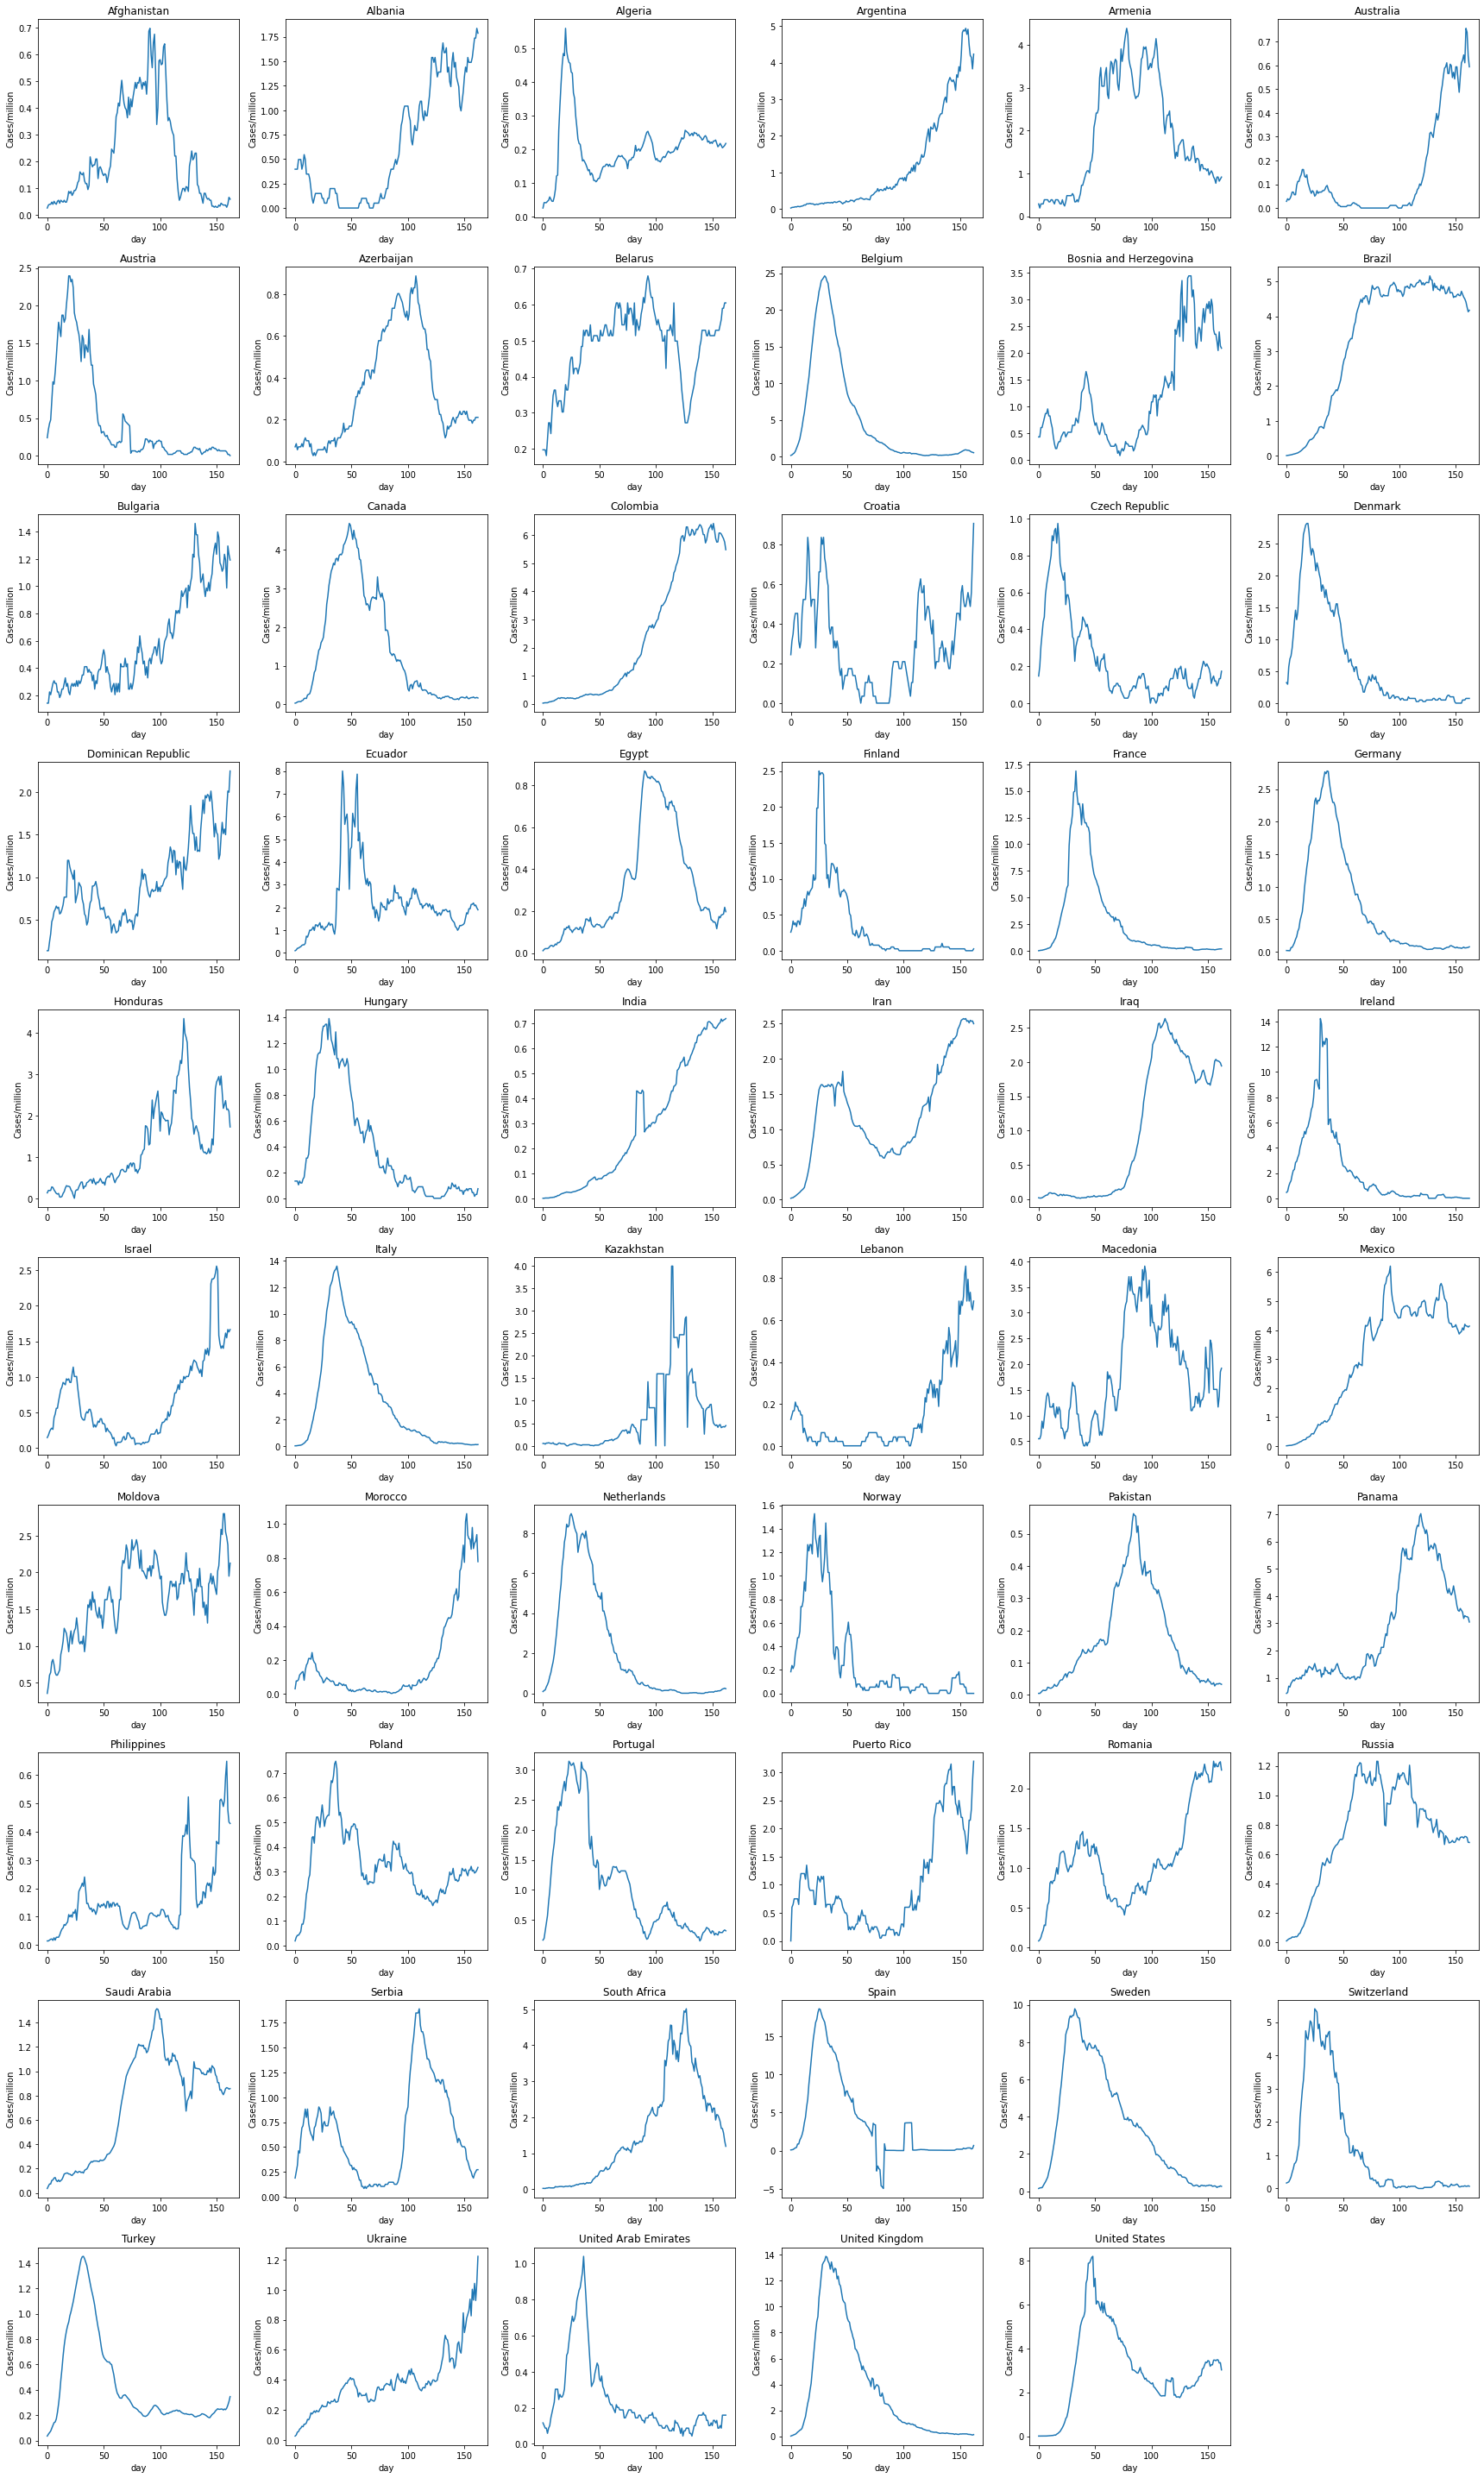

In [6]:
plot_all(countries,clusdata_all['deaths'])

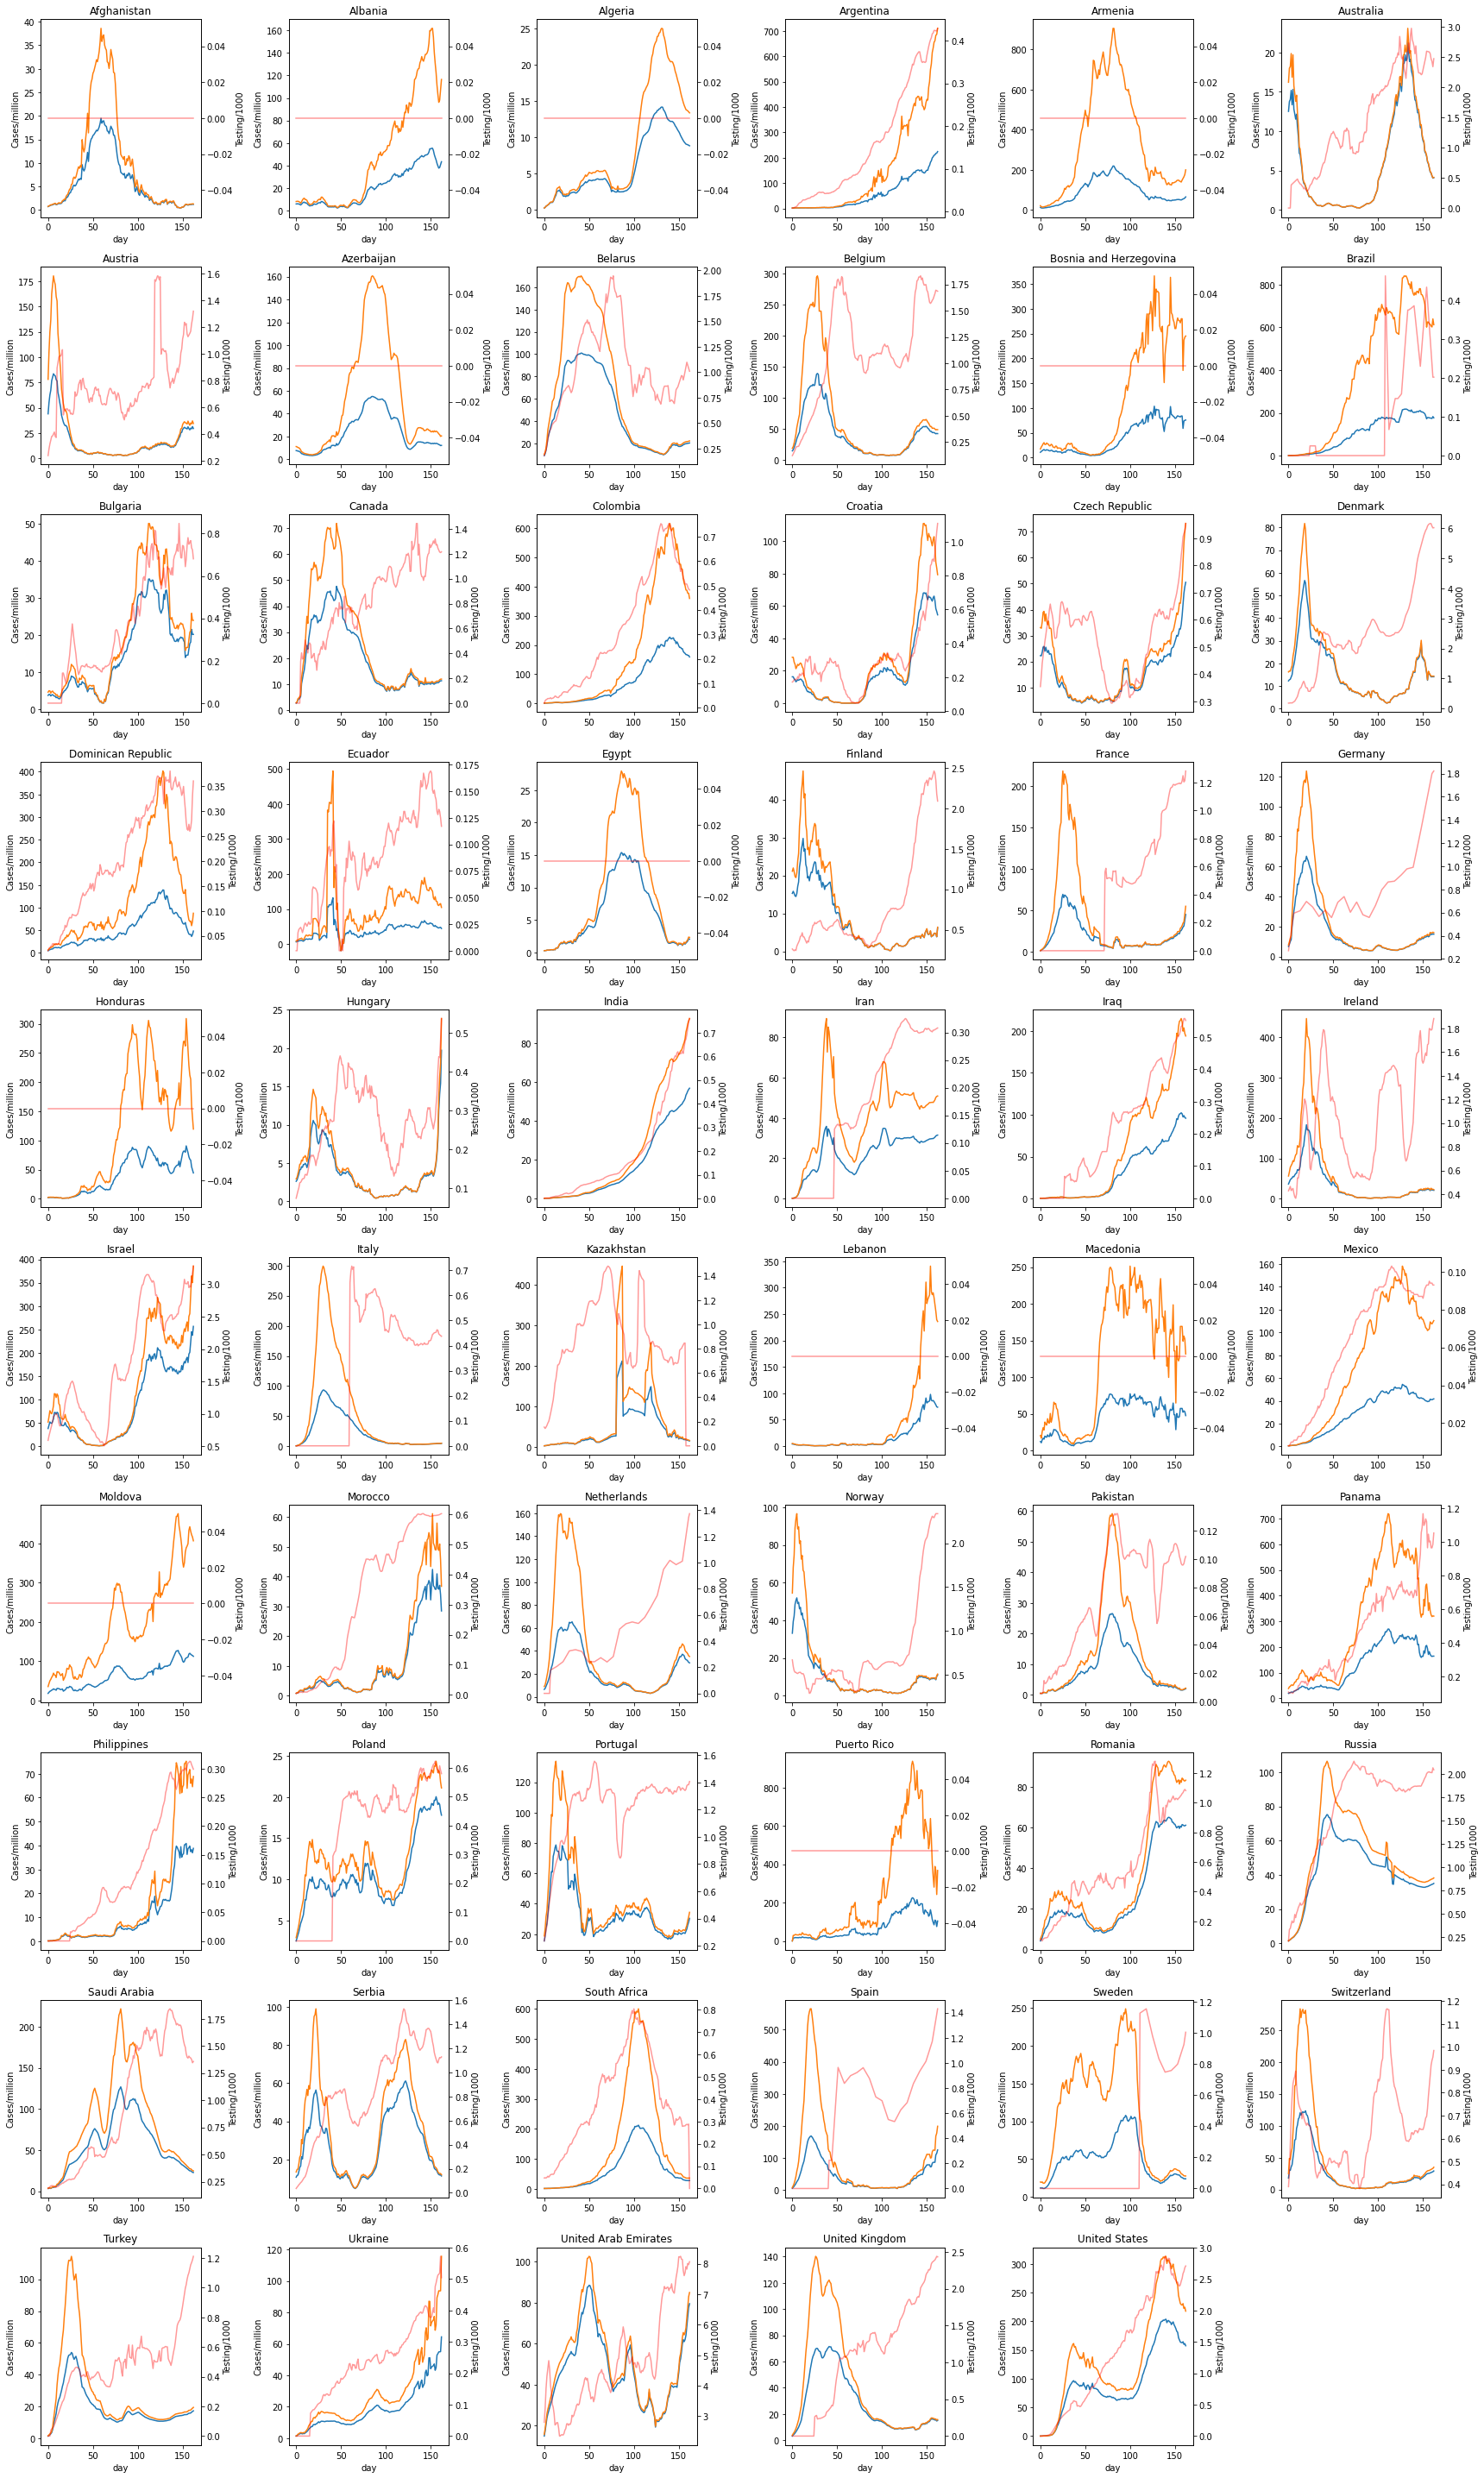

In [7]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlin'],longshort_testing_c)

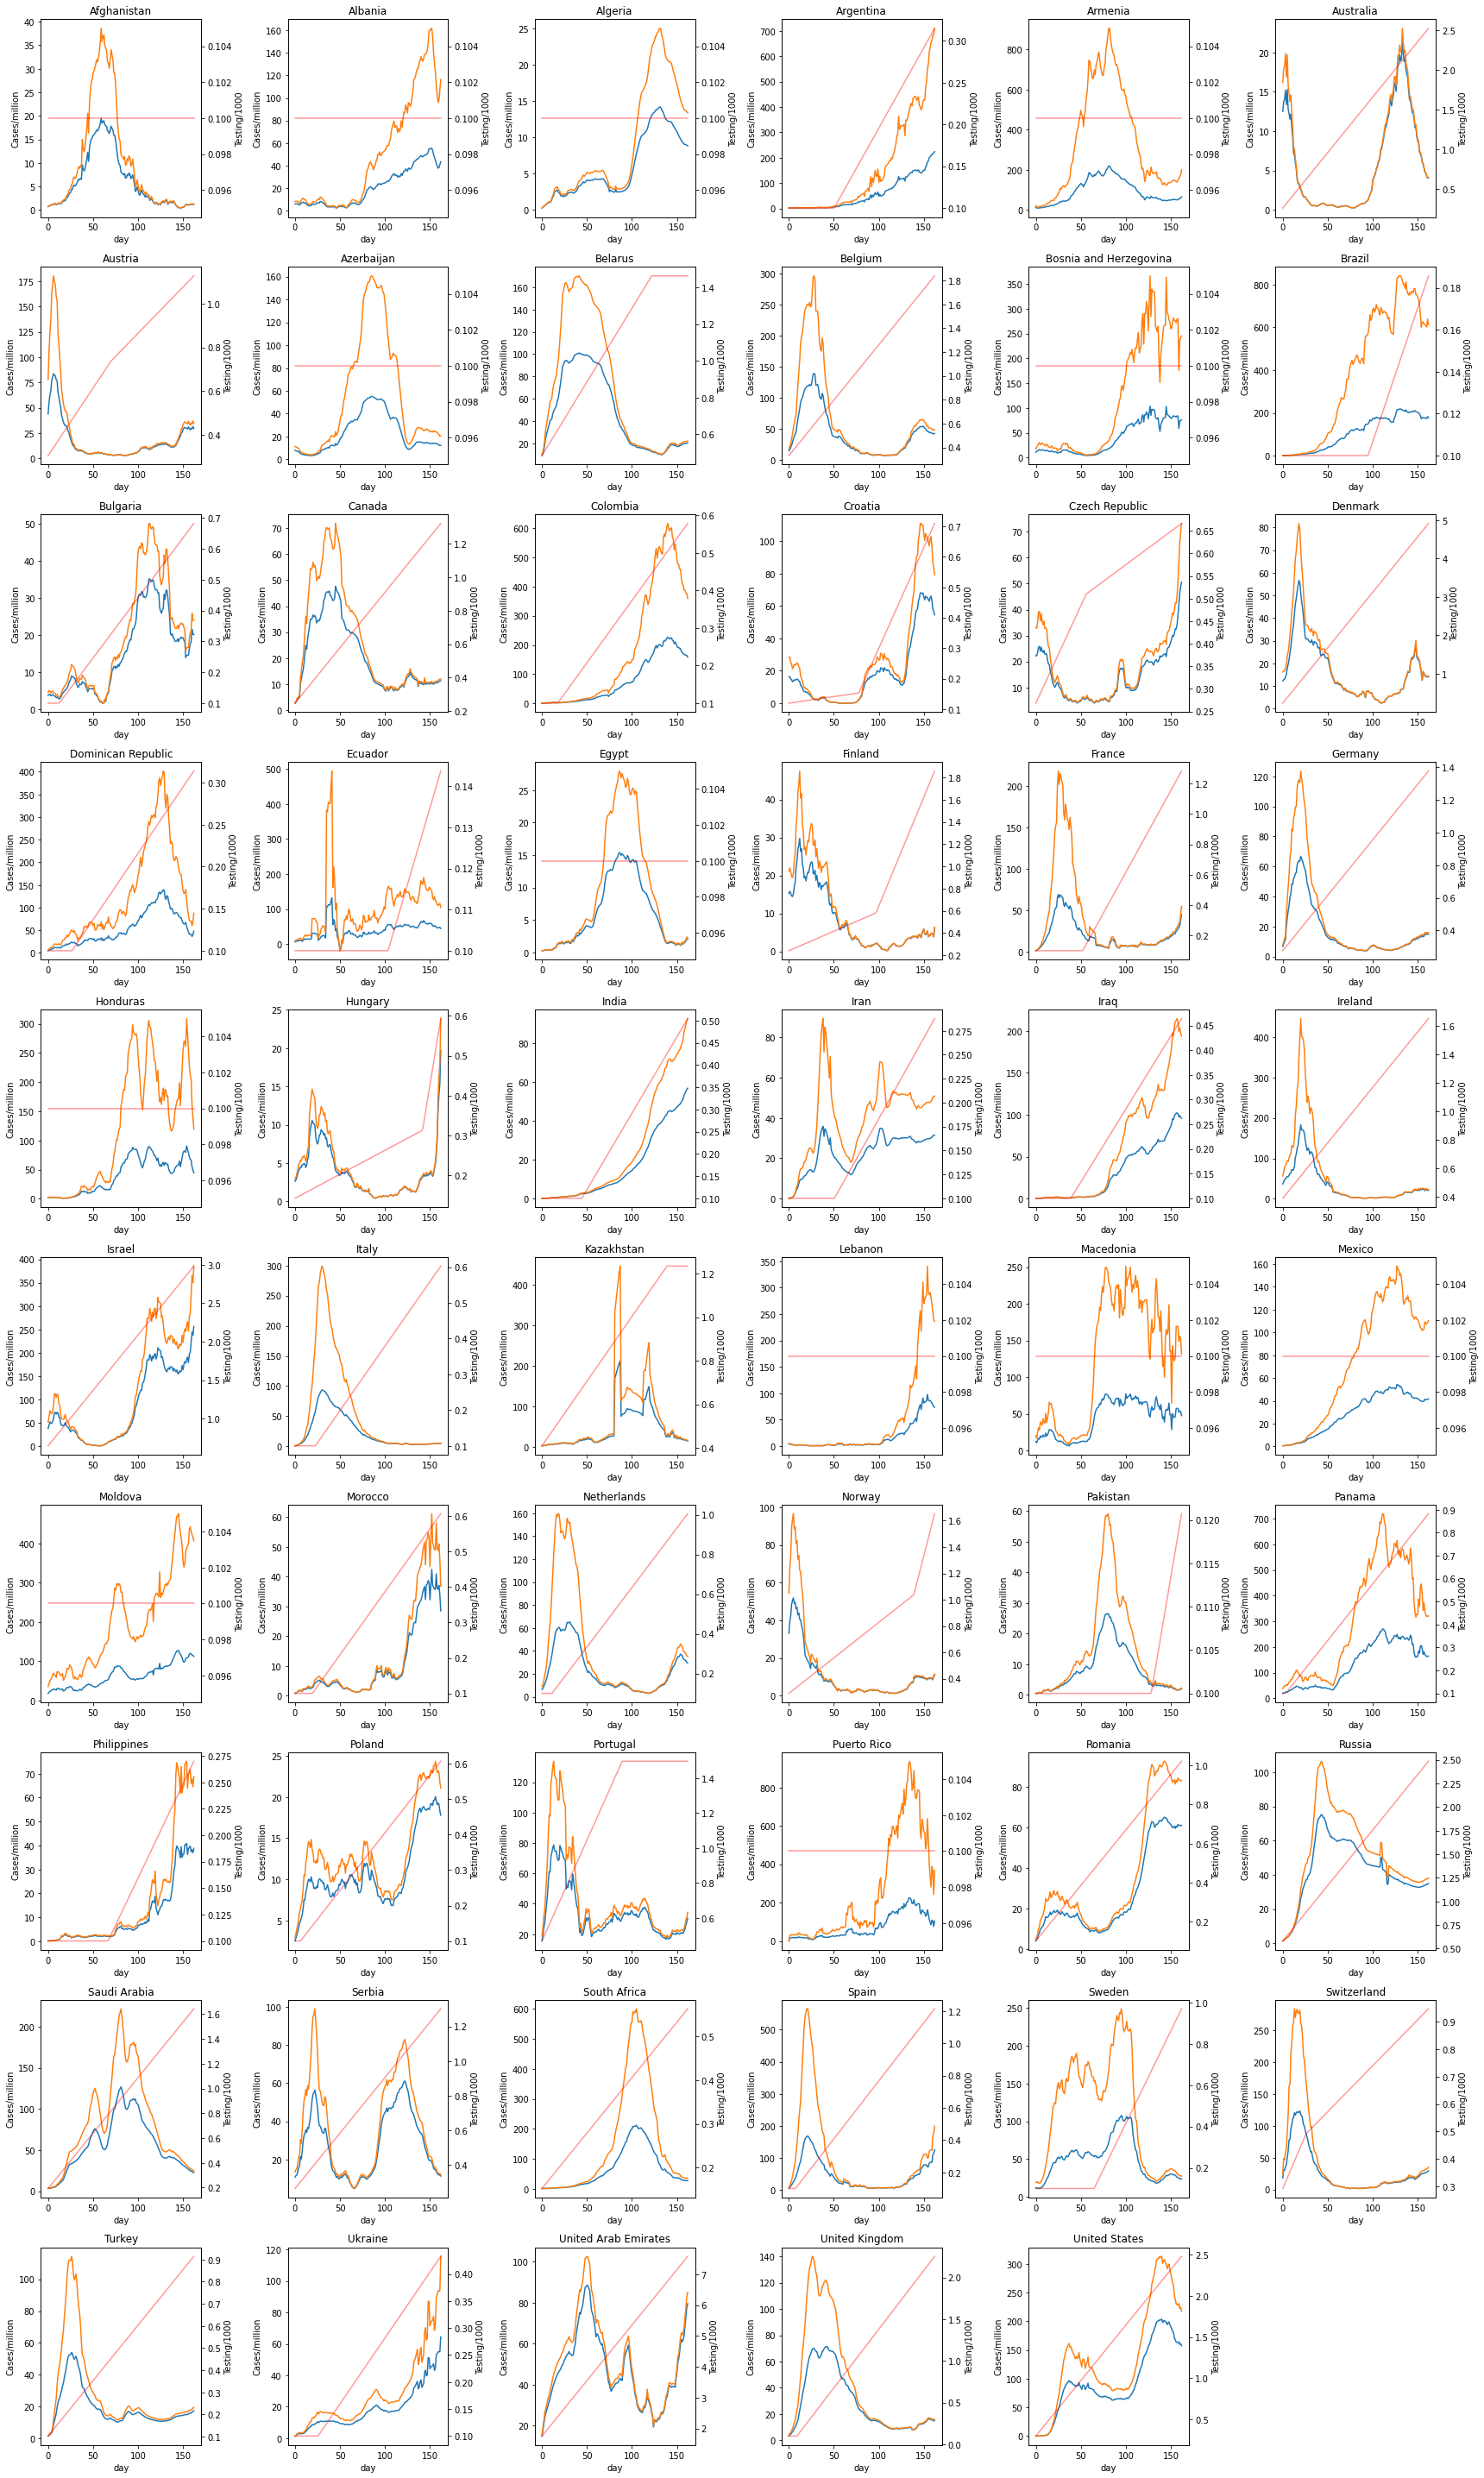

In [8]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlinr'],longshort_reg_testing_c)

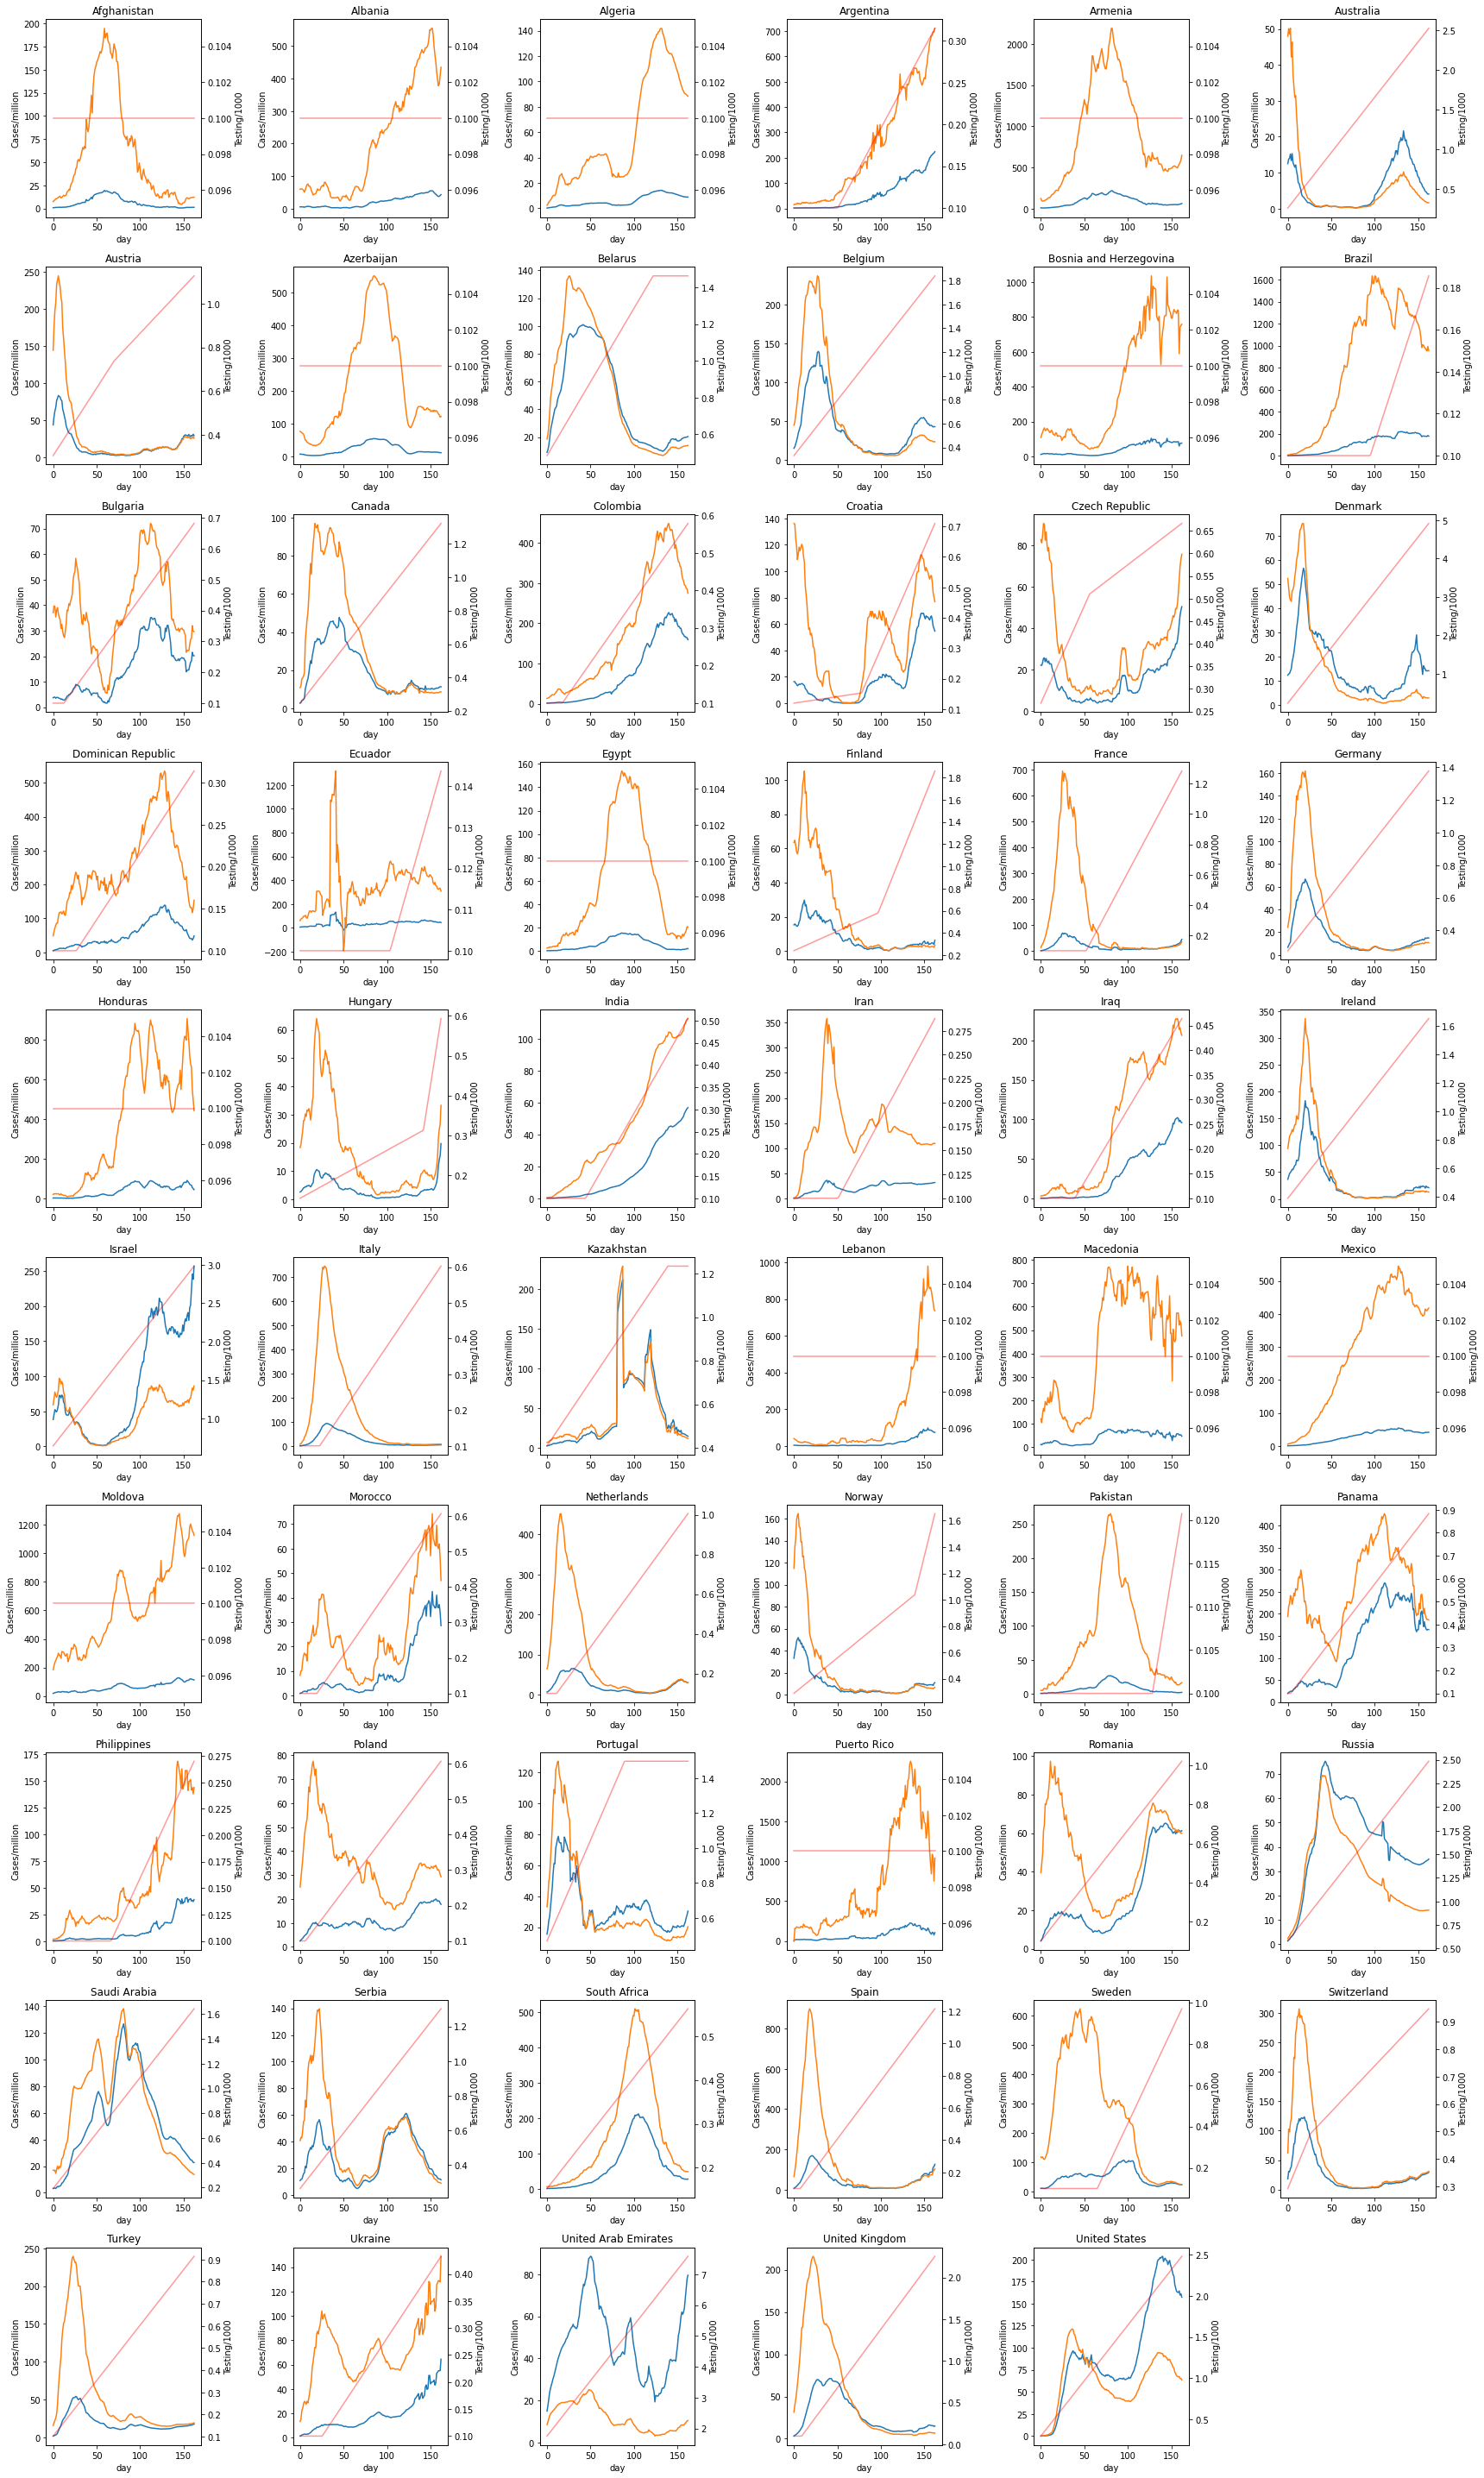

In [9]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_pwlfit'],longshort_reg_testing_c)

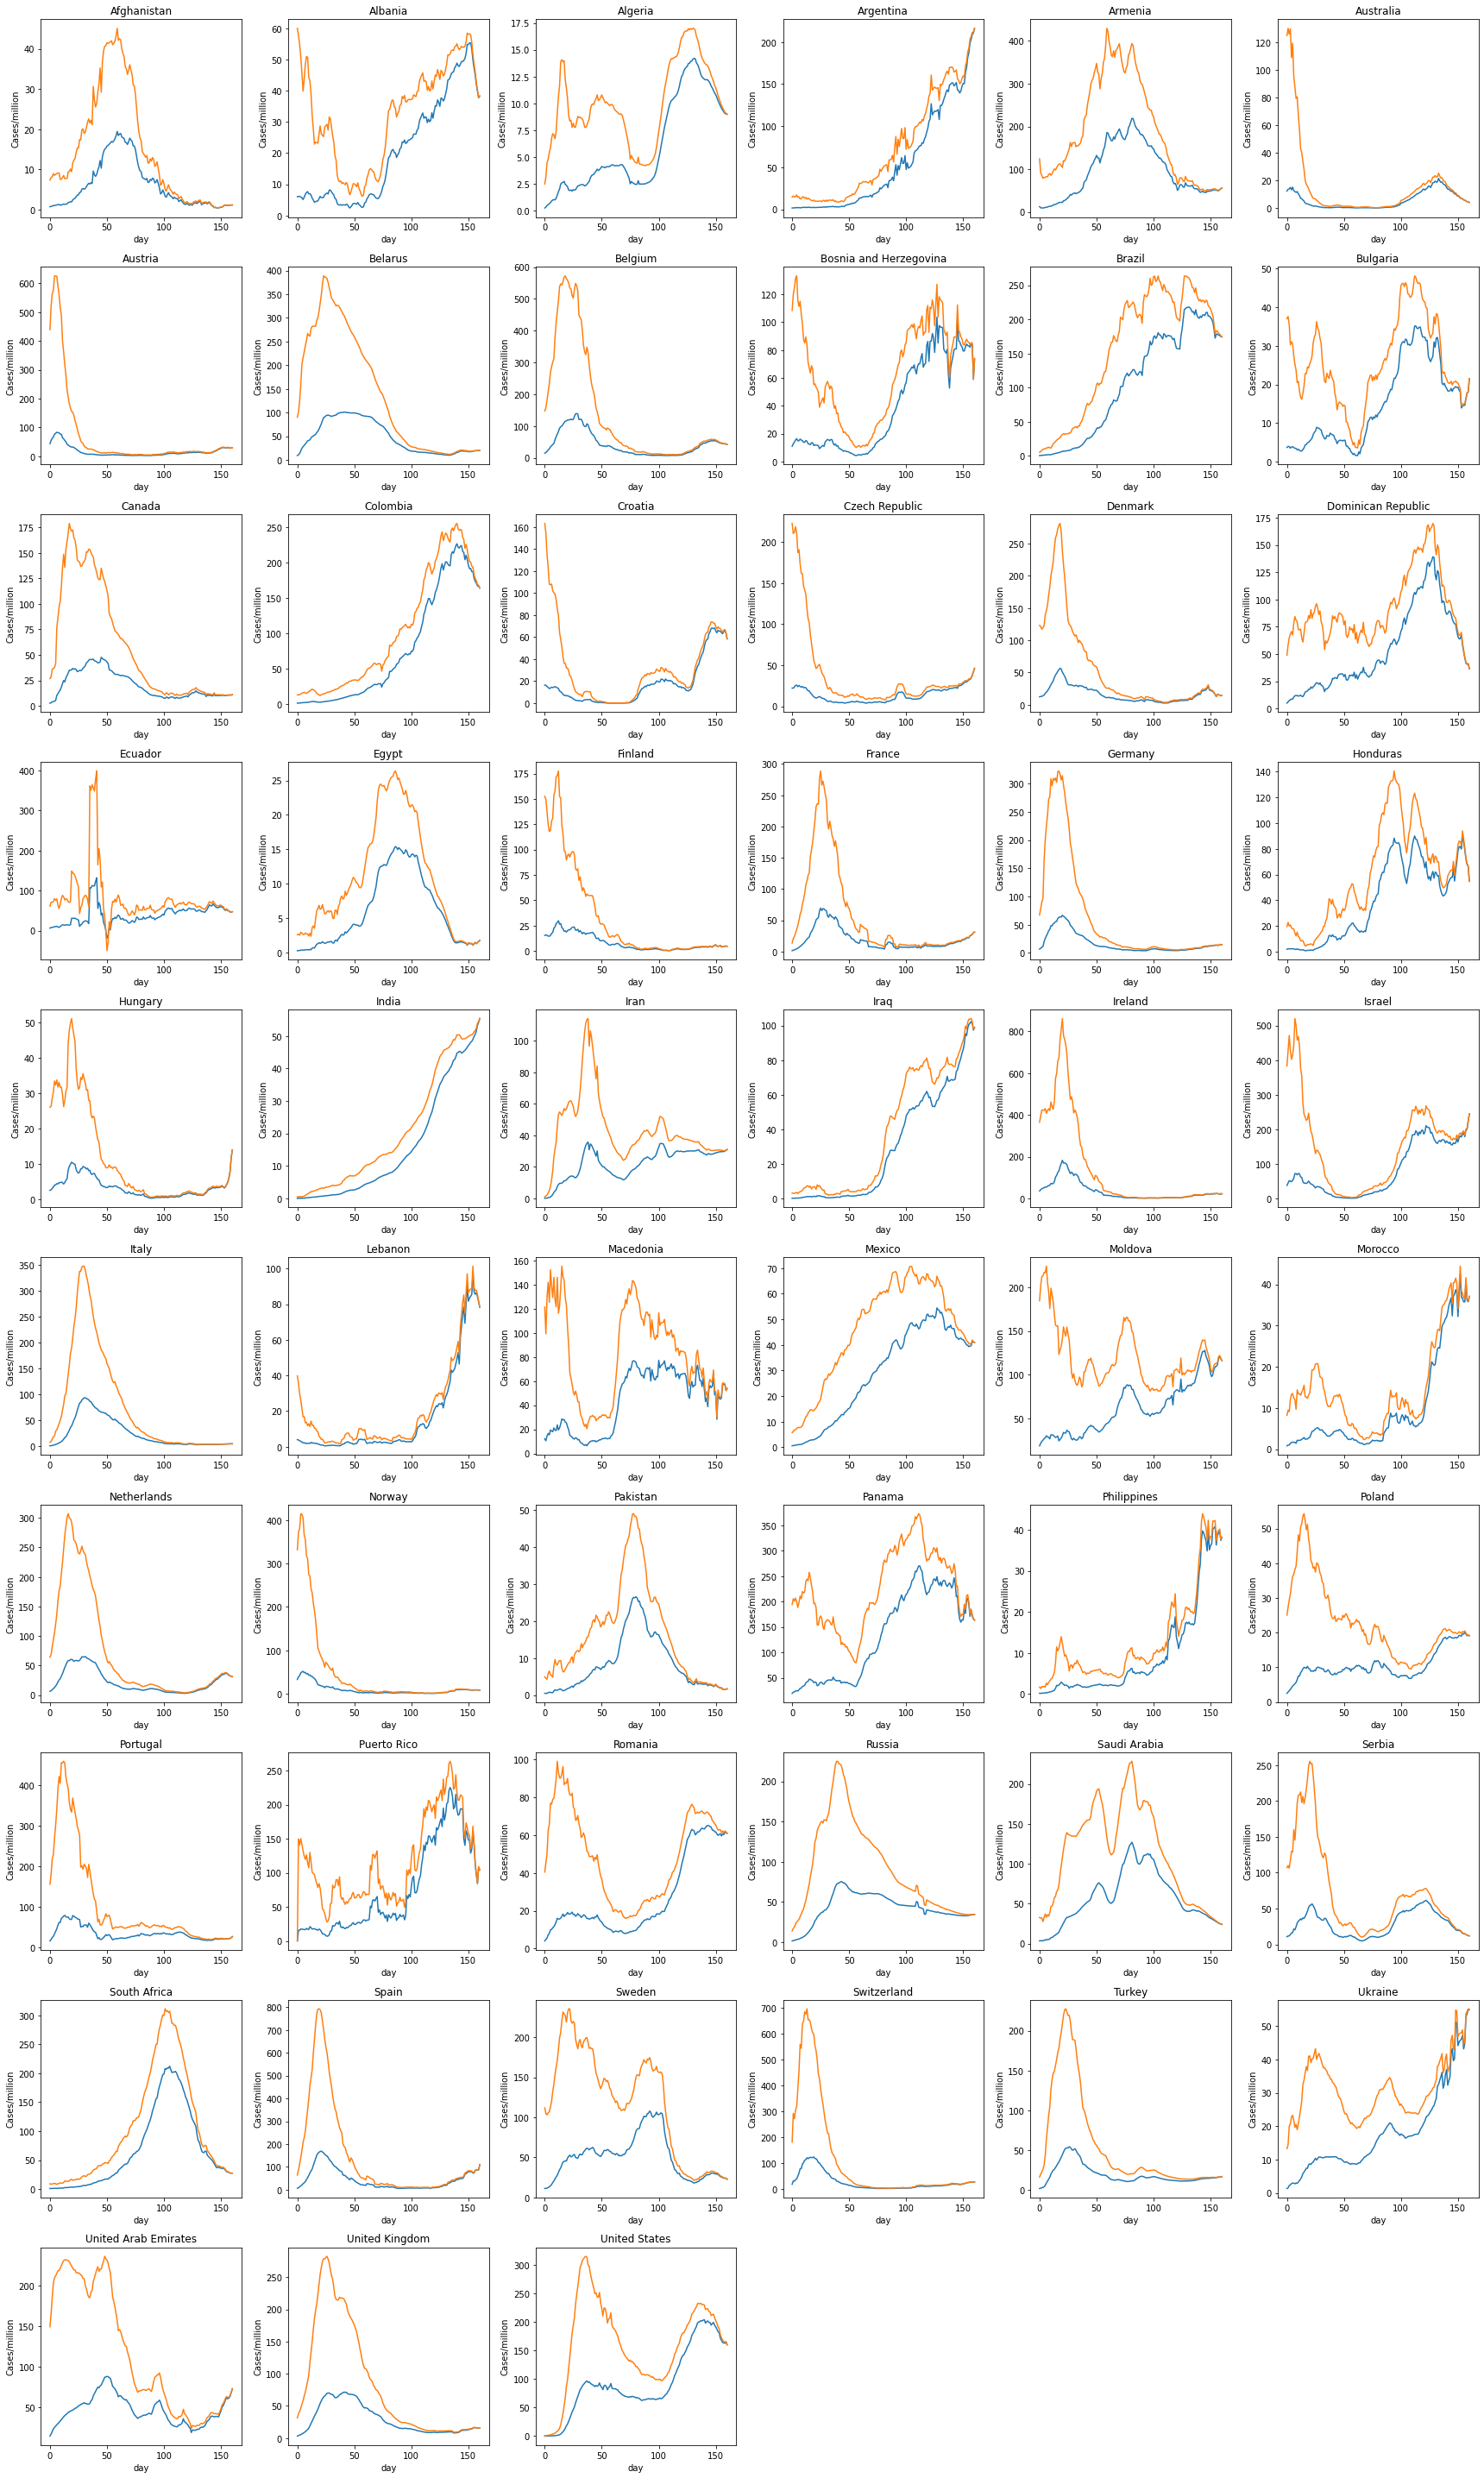

In [10]:
plot_all(lcountries,cases_raw,cases_adj_lin2020)

# Compare best clusters

In [37]:
cases = [c for c in clusdata_all]
cases

['deaths',
 'cases',
 'cases_lin2020',
 'cases_pwlfit',
 'cases_nonlin',
 'cases_nonlinr']

In [38]:
len(countries)

57

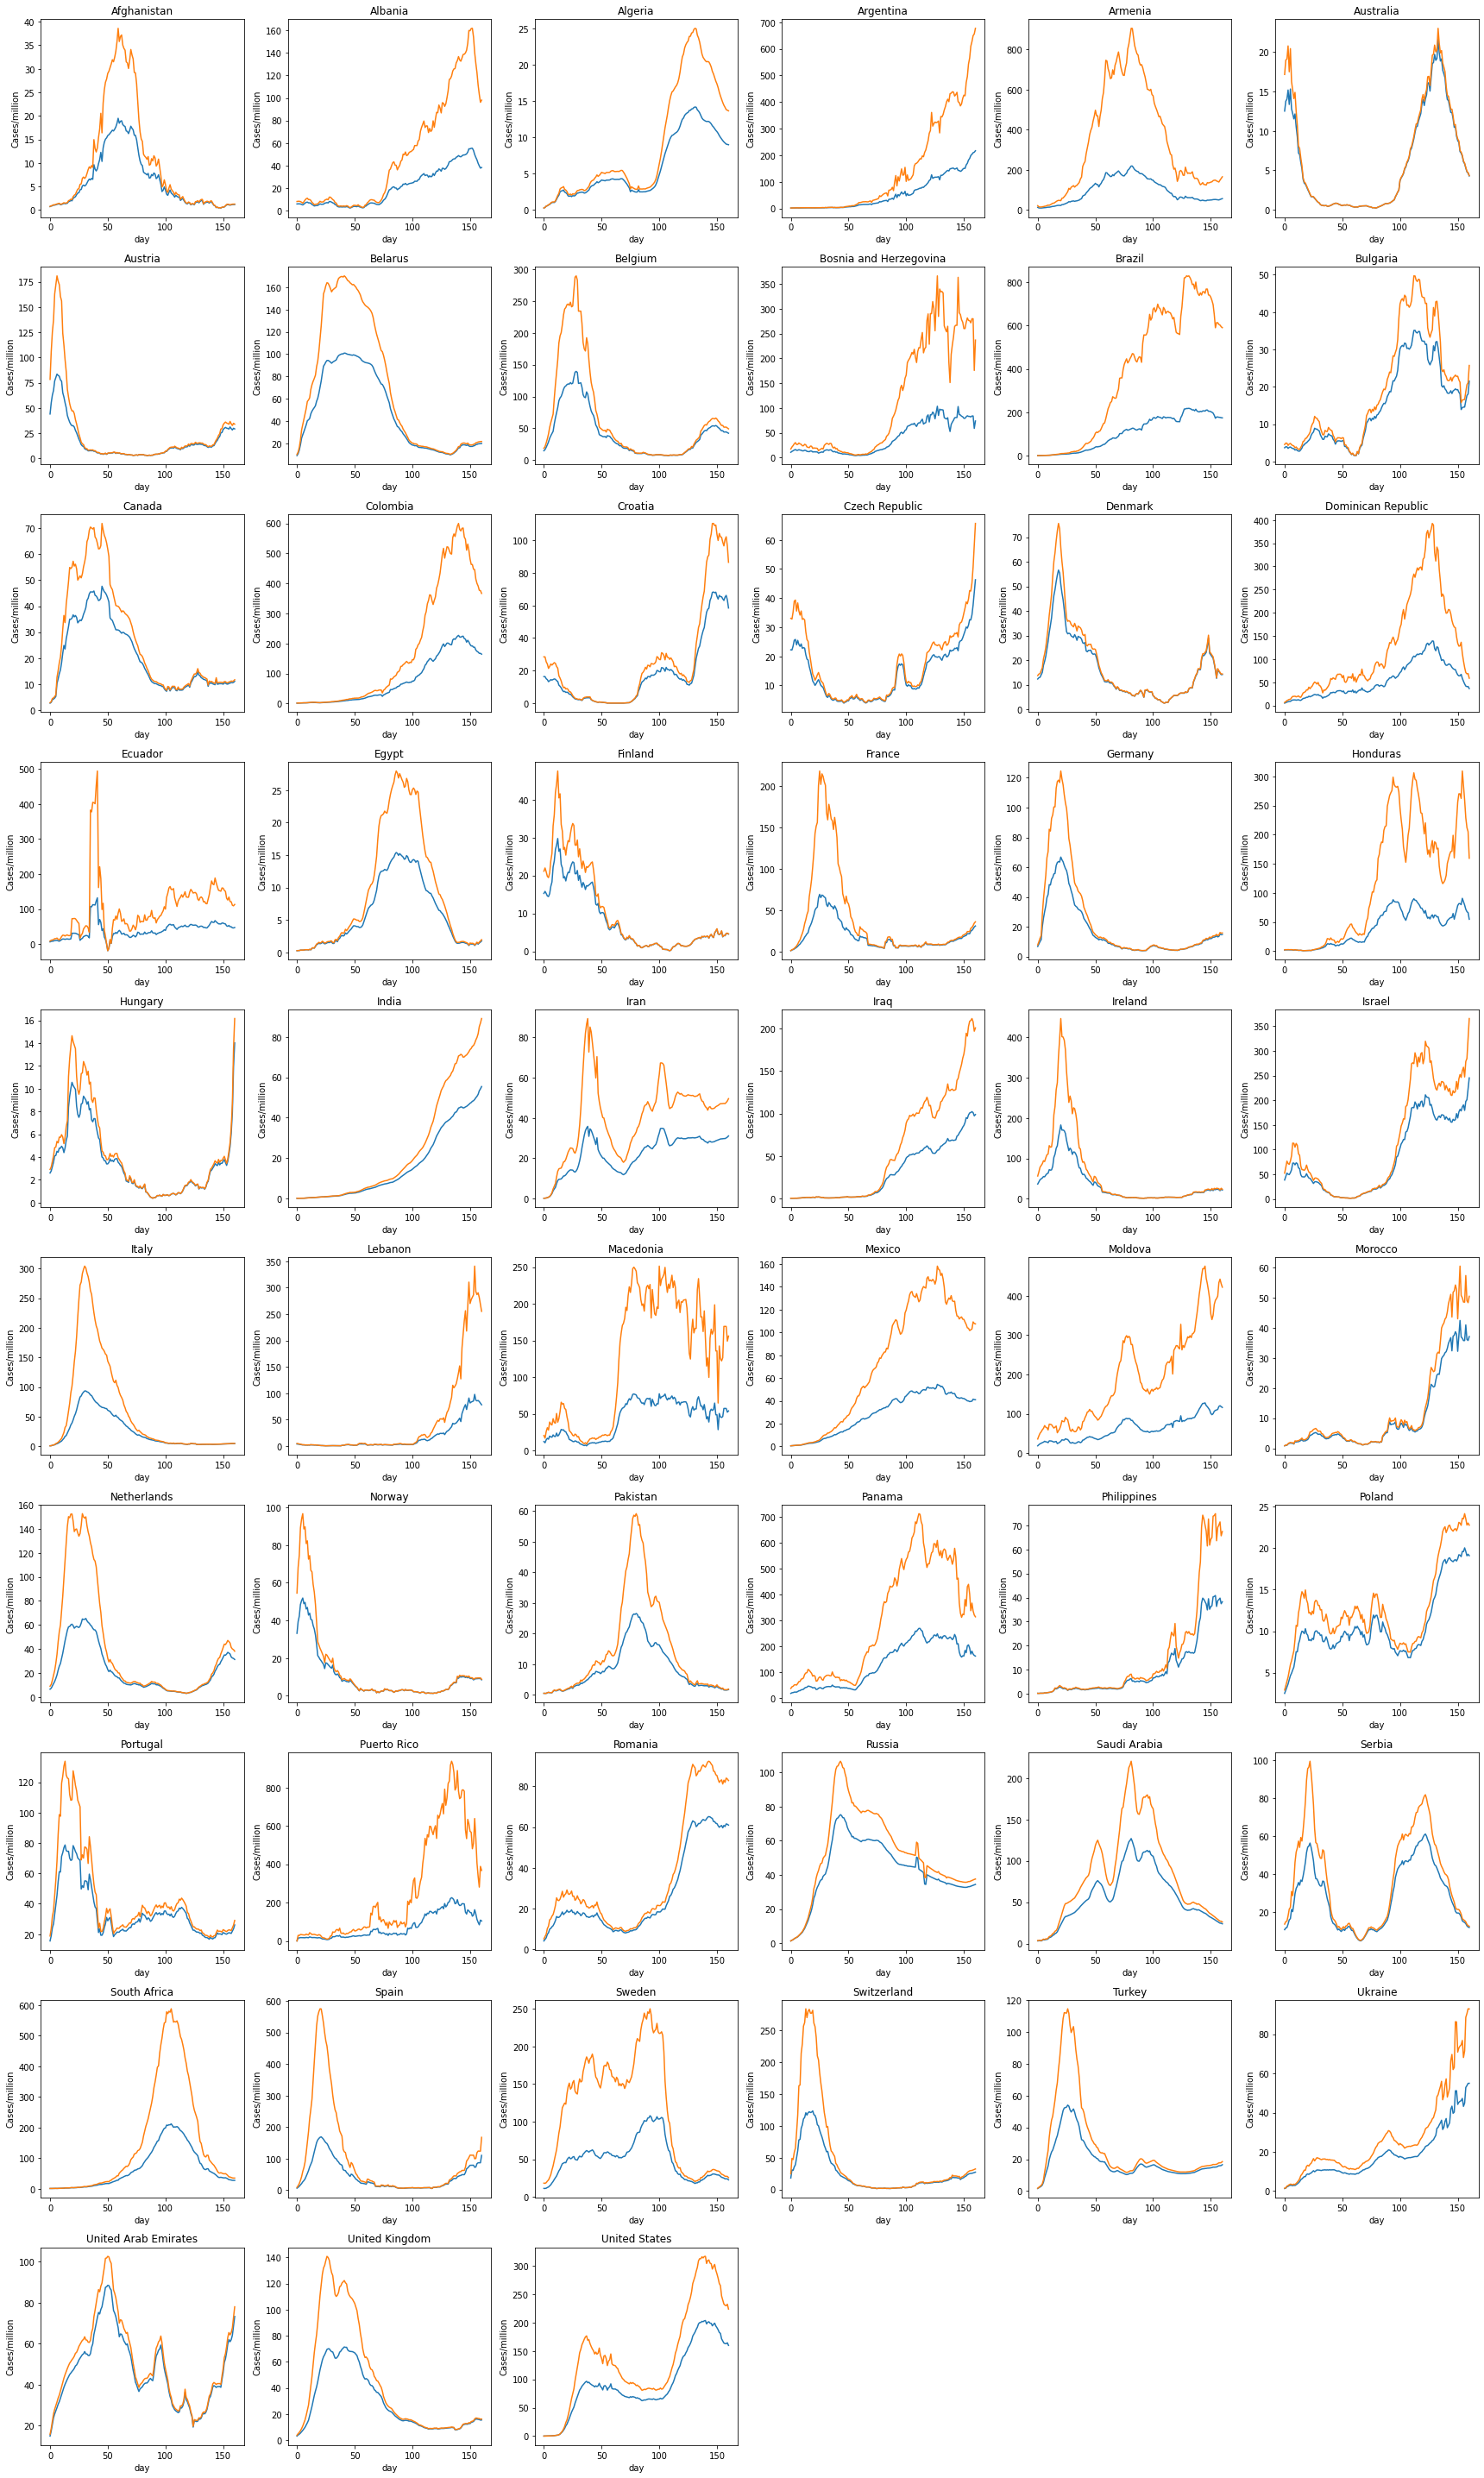

In [39]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlinr']);

In [40]:
#  Norman not sure I understand what you are printing out with "found 48 clusters of size 3" , seems wrong
res = {}
for cc in cases:
    print('doing ',cc,'...')
    mfit = ClusterFit(clusdata_all[cc])
    mfit.umap_best_cluster()
    res[cc] = mfit



doing  deaths ...
doing  cases ...
doing  cases_lin2020 ...


KeyError: 'probs'

In [ ]:
for rr in res:
    foo = res[rr]
    # foo.plot_umap() ########## doesn't work???
    plt.scatter(foo.um_dat[0],foo.um_dat[1],c=foo.clus_labels)
    plt.title(rr)
    plt.show()


In [ ]:
classes = [res[cc].clus_labels for cc in res]
corclasses = np.zeros((len(classes),len(classes)))
for i in range(len(classes)-1):
    cc = classes[i]
    for j in range(i+1,len(classes)):
        ccc = classes[j]
        cx = []
        corclasses[i,j] = mxcor(cc,ccc)
        corclasses[j,i] = corclasses[i,j]
for i in range(len(classes)):
    corclasses[i,i] = 1.0
plt.imshow(corclasses)    

In [ ]:
print([(i,c,np.mean(corclasses[i,:])) for i,c in enumerate([r for r in res])])

In [ ]:
for i in range(6):
    plt.plot(list(range(6)),corclasses[i,:])

Note: `cases_nonlin` and `cases_nonlinr` currently same.

**Cluster correlations not outstandingly high!**

In [ ]:
foo = res['cases_nonlin']

In [ ]:
def plot_adj(country, data, adj = None, testing=None,  ndays=250, axis = None):
    ndays = 250
    if testing:
        # Ntests = regtests(testing,country)  # this does not work here, since data is already synchronized, use regularized data in testing 
        Ntests = testing[country]
    if axis is None:   
        fig, ax1 = plt.subplots(figsize=(12,8))
    else:
        ax1 = axis
    ax1.plot(data[country][:ndays]) 
    if adj is not None:  # already adjusted
        ax1.plot(adj[country][:ndays])
    ax1.set_title(country)
    ax1.set_ylabel('Cases/million')
    ax1.set_xlabel('day')
    if testing:
        ax2 = ax1.twinx()
        ax2.plot(Ntests[:ndays],color='red',alpha=0.4)
        ax2.set_ylabel('Testing/1000')

        
def plot_all(countries,dat,adj=None,testing=None,ndays=250):
    max_cols=6
    max_rows=int(len(countries)/max_cols) + 1
    fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(24,4*max_rows))

    for idx, country  in enumerate(countries):
        row = idx // max_cols
        col = idx % max_cols
        plot_adj(country,dat,adj,testing,ndays,axis=axes[row,col])
    for idx in range(len(countries),max_rows*max_cols):
        row = idx // max_cols
        col = idx % max_cols
        axes[row, col].axis("off")
    #plt.subplots_adjust(wspace=.05, hspace=.05)
    fig.tight_layout()
    #for ax in fig.get_axes():
    #    ax.label_outer()
    plt.show()


In [ ]:
plt.plot(foo.smoothed[0])

In [ ]:
len(foo.dat[0,:])

In [ ]:
dat1 = {countries[i]:foo.dat[i,:] for i in range(len(countries))}
dat2 = {countries[i]:foo.smoothed[i,:] for i in range(len(countries))}
plot_all(countries,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus0 = [i for i,x in enumerate(res[cc].clus_labels) if x==0]

count0 = [countries[i] for i in clus0]
plot_all(count0,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus = [i for i,x in enumerate(res[cc].clus_labels) if x==1]

count = [countries[i] for i in clus]
plot_all(count,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus = [i for i,x in enumerate(res[cc].clus_labels) if x==2]

count = [countries[i] for i in clus]
plot_all(count,dat1,dat2)